<a href="https://colab.research.google.com/github/Andreaierardi/sentiment-puccini/blob/main/notebook/archivio_ricordi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Archivio Ricordi models**

<br>
<br>

### Dataset
Provided by the Ricordi Archive [link](https://www.digitalarchivioricordi.com/it/people/display/2/Giacomo%20Puccini)

Evalita 2016 Sentipolc [link](http://www.di.unito.it/~tutreeb/sentipolc-evalita16/index.html)


<br>
<br>

---



<br>
<br>

# Data Retrieval

<br>

In [ ]:
!pip3 install --user --upgrade pandas

In [ ]:
!pip3 install --user --upgrade openpyxl

In [ ]:
from os import path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
#stopwords.words('italian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
letters_di_puccini_na = pd.read_excel('https://github.com/Andreaierardi/sentiment-puccini/raw/main/dataset/lettere%20di%20Puccini.xlsx')
letters_a_puccini_na = pd.read_excel('https://github.com/Andreaierardi/sentiment-puccini/raw/main/dataset/lettere%20a%20Puccini.xlsx')
letters_assemble_na = pd.read_excel('https://github.com/Andreaierardi/sentiment-puccini/raw/main/dataset/verbali%20assemblea%20soci.xlsx')
letters_consiglio_na = pd.read_excel('https://github.com/Andreaierardi/sentiment-puccini/raw/main/dataset/verbali%20consiglio%20vigilanza.xlsx')

#letters_df_na = pd.read_excel('https://github.com/Andreaierardi/sentiment-puccini/raw/main/dataset/lettere%20di%20Puccini.xlsx')
#letters_df_na = pd.read_excel('https://github.com/Andreaierardi/sentiment-puccini/raw/main/dataset/lettere%20di%20Puccini.xlsx')
#letters_a_puccini_na = pd.read_excel('https://github.com/Andreaierardi/sentiment-puccini/raw/main/dataset/lettere%20a%20Puccini.xlsx')
#letters_df_na = pd.read_excel('https://github.com/Andreaierardi/sentiment-puccini/raw/main/dataset/verbali%20consiglioi%20vigilanza.xlsx')

/usr/local/lib/python3.7/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
letters_df_na= {
    "lettere di Puccini":letters_di_puccini_na,
    "lettere a Puccini":letters_a_puccini_na, 
    "verbali consiglio vigilanza":letters_consiglio_na, 
    "verbali assemblea soci":letters_assemble_na

    }

In [ ]:
letters_df_dict = {
    "lettere di Puccini":  letters_di_puccini_na.loc[letters_di_puccini_na['tabTrascrLettere_lettere::testoTab'].dropna().index], #letters_di_puccini_na.dropna(),
    "lettere a Puccini": letters_a_puccini_na.loc[letters_a_puccini_na['tabTrascrLettere_lettere::testoTab'].dropna().index],  #letters_a_puccini_na.dropna(), 
    "verbali consiglio vigilanza": letters_consiglio_na.loc[letters_consiglio_na['tabTrascrLettere_lettere::testoTab'].dropna().index], #letters_consiglio_na.dropna(axis=0,subset=['segnatura',	'giorno',	'mese',	'anno',	'contenuto',	'tipologia'	,	'tabTrascrLettere_lettere::testoTab'], how="all") , 
    "verbali assemblea soci":letters_assemble_na.loc[letters_assemble_na['tabTrascrLettere_lettere::testoTab'].dropna().index] #letters_assemble_na.dropna(axis=0,subset=['segnatura',	'giorno',	'mese',	'anno',	'contenuto',	'tipologia'	,	'tabTrascrLettere_lettere::testoTab'], how="all")

    }

In [ ]:
letters_list_dict = {}
for key in letters_df_dict:
  letters_df_dict[key] = letters_df_dict[key].rename(columns={'tabTrascrLettere_lettere::testoTab': "text"})
  letters_list_dict[key] =  [let for let in letters_df_dict[key]['text']]
   

<br>
<br>


# **Pre-processing data**# 

In [ ]:
def get_sent_feature(df):
  sent = []
  for i, j in df[['opos','oneg', 'text']].iterrows():
    if j['opos'] == 1 and j['oneg'] == 1:
      sent.append(2)
    elif j['opos'] == 0 and j['oneg'] == 1:
      sent.append(-1)
    elif j['opos'] == 1 and  j['oneg'] == 0:
      sent.append(1)
    else:
      sent.append(0)
  return sent

In [ ]:
def get_sent_feature_binary(df):
  sent = []
  for i, j in df[['opos','oneg', 'text']].iterrows():
    if j['opos'] == 1 and j['oneg'] == 1:
      sent.append(2)
    elif j['opos'] == 0 and j['oneg'] == 1:
      sent.append(-1)
    elif j['opos'] == 1 and  j['oneg'] == 0:
      sent.append(1)
    else:
      sent.append(2)
  return sent

In [ ]:
train = pd.read_csv('https://raw.githubusercontent.com/Andreaierardi/sentiment-puccini/main/dataset/training_set_sentipolc16%203.csv')
train

,idtwitter,subj,opos,oneg,iro,lpos,lneg,top,text
0,122449983151669248,1,0,1,0,0,1,1,Intanto la partita per Via Nazionale si compli...
1,125485104863780865,1,0,1,0,0,1,1,"False illusioni, sgradevoli realtà Mario Monti..."
2,125513454315507712,1,0,1,0,0,1,1,"False illusioni, sgradevoli realtà #editoriale..."
3,125524238290522113,1,0,1,0,0,1,1,Mario Monti: Berlusconi risparmi all'Italia il...
4,125527933224886272,1,0,1,0,0,1,1,Mario Monti: Berlusconi risparmi all'Italia il...
...,...,...,...,...,...,...,...,...,...
7405,135136897000415233,1,1,0,1,1,1,1,"che ci frega di mario monti, noi abbiamo mario..."
7406,143471916534087680,1,1,0,1,1,0,1,Strepitoso il titolo in prima di Libero sul go...
7407,153955345411219456,1,0,1,1,1,0,1,"@nataliacavalli Consolati, il governo #Monti h..."
7408,190835515552047104,1,1,0,1,1,1,0,"@SheisCandida beh, beate loro! Io nn possiedo ..."


In [ ]:
train['sent'] = get_sent_feature(train)

In [ ]:
train_binary = train.copy()
train_binary['sent'] = get_sent_feature_binary(train)
train_binary = train_binary[train_binary['sent'] !=2]

In [ ]:
training_set = train.drop(labels=[ "idtwitter", 'subj','opos','oneg','lpos','lneg', 'top','iro'], axis=1)

In [ ]:
training_set_binary = train_binary.drop(labels=[ "idtwitter", 'subj','opos','oneg','lpos','lneg', 'top','iro'], axis=1)

In [ ]:
test_set = pd.read_csv('https://raw.githubusercontent.com/Andreaierardi/sentiment-puccini/main/dataset/test_set_sentipolc16_gold2000%202.csv', error_bad_lines=False, header=None)
test_set.columns = train.columns[:-1]

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 110: expected 9 fields, saw 10\nSkipping line 131: expected 9 fields, saw 10\nSkipping line 213: expected 9 fields, saw 10\nSkipping line 273: expected 9 fields, saw 10\nSkipping line 282: expected 9 fields, saw 10\nSkipping line 283: expected 9 fields, saw 10\nSkipping line 296: expected 9 fields, saw 10\nSkipping line 304: expected 9 fields, saw 10\nSkipping line 321: expected 9 fields, saw 10\nSkipping line 361: expected 9 fields, saw 17\nSkipping line 428: expected 9 fields, saw 10\nSkipping line 453: expected 9 fields, saw 10\nSkipping line 518: expected 9 fields, saw 10\nSkipping line 539: expected 9 fields, saw 17\nSkipping line 568: expected 9 fields, saw 10\nSkipping line 579: expected 9 fields, saw 10\nSkipping line 599: expect

In [ ]:
test_set['sent'] = get_sent_feature(test_set)

In [ ]:
test_set_binary = test_set.copy()
test_set_binary['sent'] = get_sent_feature_binary(test_set)
test_set_binary = test_set_binary[test_set_binary['sent'] != 2]

In [ ]:
test_set = test_set.drop(labels=[ "idtwitter", 'subj','opos','oneg','lpos','lneg', 'top','iro'], axis=1)

In [ ]:
test_set_binary = test_set_binary.drop(labels=[ "idtwitter", 'subj','opos','oneg','lpos','lneg', 'top','iro'], axis=1)

In [ ]:
test_set

,text,sent
0,Tra 5 minuti presentazione piano scuola del go...,0
1,\@matteorenzi: Alle 10 appuntamento su http://...,1
2,#labuonascuola gli #evangelisti #digitali non ...,-1
3,Riforma scuola Tutto il discorso di Renzi su ...,0
4,.@matteorenzi @MiurSocial #labuonascuola basta...,0
...,...,...
1938,Anche prodotti alimentari tipici pugliesi in v...,0
1939,intensità di vita https://t.co/jv4aARxzhz,0
1940,Oggi tutti che iniziano l'università e io sul ...,2
1941,@GliIntoccabili @nonleggerlo Ma Ferrero? il co...,-1


In [ ]:
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer

# Custom Transformer (Inheriting from classes)
class CleanText( BaseEstimator, TransformerMixin ):
    
   
    def __init__( self, lang = "italian"):
        self.lang = lang
        self.stemmer = SnowballStemmer(self.lang)
    
       
    def fit( self, X, y = None ):
        return self 
    
   
    def clean( self, x ):
        words   = [self.stemmer.stem(word) for word in word_tokenize(x.lower()) if word.isalpha() and word not in stopwords.words("italian")]
        return " ".join(words)
    
   
    def transform( self, X, y = None ):
        return X["text"].apply(self.clean)

In [ ]:
class CustomFeatures( BaseEstimator, TransformerMixin ):
    
    def __init__( self ):
        return
    
    def fit( self, X, y = None ):
        return self 
        
    def transform( self, X, y = None ):
        f           = pd.DataFrame()
        f['len']    = X['text'].str.len()
        f['digits'] = X['text'].str.findall(r'\d').str.len()
        f['punct']  = X['text'].str.findall(r'[^a-zA-Z\d\s:]').str.len()
        return f[['len','digits','punct']]

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler

 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.utils import shuffle

def drop_target_suffle(training,test):
  x_train = training.drop(["sent"],axis=1)
  y_train = training["sent"]
  x_test = test.drop(["sent"],axis=1)
  y_test = test["sent"] 
  
  x_train, y_train =  shuffle(x_train, y_train)
  x_train = x_train.reset_index(drop=True)
  y_train = y_train.reset_index(drop=True)

  x_test, y_test =  shuffle(x_test, y_test)
  x_test = x_test.reset_index(drop=True)
  y_test = y_test.reset_index(drop=True)

  x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.20)


  print("Shapes")
  print("Train")
  print("x_train",x_train.shape)
  print("y_train",y_train.shape)
  print("")
  print("Valid")
  print("x_valid",x_valid.shape)
  print("y_valid",y_valid.shape)
  print("")

  
  # extract features
  pipe_bi = Pipeline([("extract", FeatureUnion([("terms", Pipeline([('clean', CleanText()), 
                                                                ('tfidf', TfidfVectorizer(ngram_range = (1,2)))])),
                                            ("custom", CustomFeatures())])),
                  ("select", SelectKBest(score_func = chi2,k = 500)),
                  ("scale", StandardScaler(with_mean = False))])
  X_train_bi =pipe_bi.fit_transform(x_train,y_train)
  X_valid_bi = pipe_bi.transform(x_valid)
  X_test_bi = pipe_bi.transform(x_test)

  #X_letters_bi = pipe_bi.transform(letters_df[['text']])
  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()

  y_train_enc = le.fit_transform(y_train)
  y_valid_enc = le.transform(y_valid)
  y_test_enc = le.transform(y_test)


  import numpy as np
  from keras.utils import np_utils

  no_of_classes = len(np.unique(y_train))
  y_train_seq = np_utils.to_categorical(y_train_enc,no_of_classes)
  y_valid_seq = np_utils.to_categorical(y_valid_enc,no_of_classes)
  y_test_seq= np_utils.to_categorical(y_test_enc,no_of_classes)
  return X_train_bi,y_train_seq,X_valid_bi, y_valid_seq, X_test_bi, y_test_seq, y_train_enc, y_valid_enc, y_test_enc,pipe_bi, le

In [ ]:
X_train,y_train,X_valid, y_valid,X_test,y_test,y_train_enc, y_valid_enc, y_test_enc, pipe, label_enc = drop_target_suffle(training_set, test_set)

Shapes
Train
x_train (5928, 1)
y_train (5928,)

Valid
x_valid (1482, 1)
y_valid (1482,)



In [ ]:
X_train_b,y_train_b,X_valid_b, y_valid_b,X_test_b,y_test_b,y_train_enc_b, y_valid_enc_b, y_test_enc_b, pipe_b, label_enc_b = drop_target_suffle(training_set_binary, test_set_binary)

Shapes
Train
x_train (3323, 1)
y_train (3323,)

Valid
x_valid (831, 1)
y_valid (831,)



In [ ]:
X_letters= pipe.transform(letters_df[['text']])

In [ ]:
X_letters_b = pipe_b.transform(letters_df[['text']])

In [ ]:
letters_df_dict.keys()

dict_keys(['lettere di Puccini', 'lettere a Puccini', 'verbali consiglio vigilanza', 'verbali assemblea soci'])

In [ ]:
X_letters_dict = {}
X_letters_b_dict = {}

for key in letters_df_dict:
  X_letters_dict[key] = pipe.transform(letters_df_dict[key][['text']])
  X_letters_b_dict[key] = pipe_b.transform(letters_df_dict[key][['text']])

<hr>
<br>
<br>

# CV Neural Networks 

<br>


In [ ]:
from keras.callbacks import History
import tensorflow as tf
import keras
from keras import layers
from keras import models
from keras import utils
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import Activation
from keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import RMSprop

In [ ]:
def createNN_tuning_binary(init_mode='uniform',drop_out=0.1, init_nodes1 =64, init_nodes2 = 64,dim = 500):
    # define model
    model = Sequential()
    model.add(Dense(init_nodes1, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=dim)) 
    model.add(Dropout(drop_out))
    model.add(Dense(init_nodes2, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(Dense(1, kernel_initializer=init_mode, activation=tf.nn.sigmoid))
    # compile model
    model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
    return model

In [ ]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def createNN_tuning(init_mode='uniform',drop_out=0.1, init_nodes1 =64, init_nodes2 = 64,dim = 500):
    # define model
    model = Sequential()
    model.add(Dense(init_nodes1, kernel_initializer=init_mode, activation=tf.nn.relu, input_dim=dim)) 
    model.add(Dropout(drop_out))
    model.add(Dense(init_nodes2, kernel_initializer=init_mode, activation=tf.nn.relu))
    model.add(Dense(4, kernel_initializer=init_mode, activation=tf.nn.softmax))
    # compile model
    model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])
    return model

In [ ]:
seed = 7
numpy.random.seed(seed)
batch_size = 128
epochs = 50

model_CV_binary = KerasClassifier(build_fn=createNN_tuning_binary,  
                           batch_size=batch_size, verbose=1,  )



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  import sys


In [ ]:
seed = 7
numpy.random.seed(seed)
batch_size = 128
epochs = 50

model_CV = KerasClassifier(build_fn=createNN_tuning,  
                           batch_size=batch_size, verbose=1,  )



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  import sys


In [ ]:
# define the grid search parameters
init_mode = ['uniform', 'lecun_uniform', 'normal']
init_nodes1 = [64,128,256]
init_nodes2 = [64,128,256]
drop_out = [0.1,0.3,0.5]
epochs = [30,50]

param_grid = dict(init_mode=init_mode, init_nodes1 = init_nodes1, init_nodes2 = init_nodes2, drop_out= drop_out,epochs= epochs)


In [ ]:
grid_binary = GridSearchCV(estimator=model_CV_binary, param_grid=param_grid, n_jobs=-1, cv=3)


In [ ]:
grid = GridSearchCV(estimator=model_CV, param_grid=param_grid, n_jobs=-1, cv=3)


In [ ]:
model_earlystop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0, patience=5, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)

In [ ]:
nn_tune_binary= createNN_tuning_binary(drop_out=0.5, init_mode="normal",init_nodes1=64, init_nodes2 = 128)

In [ ]:
nn_tune= createNN_tuning(drop_out=0.5, init_mode="normal",init_nodes1=64, init_nodes2 = 256)

In [ ]:
history_tune_binary = nn_tune_binary.fit(X_train_b, y_train_enc_b,validation_data=(X_valid_b, y_valid_enc_b), epochs=30, batch_size=1024,callbacks=model_earlystop)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_2/dense_6/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


4/4 [==============================] - 1s 76ms/step - loss: 0.6917 - accuracy: 0.5378 - val_loss: 0.6799 - val_accuracy: 0.6113
Epoch 2/30
4/4 [==============================] - 0s 15ms/step - loss: 0.6718 - accuracy: 0.6299 - val_loss: 0.6635 - val_accuracy: 0.6679
Epoch 3/30
4/4 [==============================] - 0s 16ms/step - loss: 0.6497 - accuracy: 0.7024 - val_loss: 0.6399 - val_accuracy: 0.7124
Epoch 4/30
4/4 [==============================] - 0s 15ms/step - loss: 0.6253 - accuracy: 0.7346 - val_loss: 0.6104 - val_accuracy: 0.7316
Epoch 5/30
4/4 [==============================] - 0s 16ms/step - loss: 0.5883 - accuracy: 0.7659 - val_loss: 0.5774 - val_accuracy: 0.7401
Epoch 6/30
4/4 [==============================] - 0s 16ms/step - loss: 0.5513 - accuracy: 0.7767 - val_loss: 0.5494 - val_accuracy: 0.7437
Epoch 7/30
4/4 [==============================] - 0s 16ms/step - loss: 0.5006 - accuracy: 0.7969 - val_loss: 0.5331 - val_accuracy: 0.7449
Epoch 8/30
4/4 [======================

In [ ]:
history_tune = nn_tune.fit(X_train, y_train,validation_data=(X_valid, y_valid), epochs=30, batch_size=512,callbacks=model_earlystop)

Epoch 1/30


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential_3/dense_9/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential_3/dense_9/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/sequential_3/dense_9/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


12/12 [==============================] - 2s 43ms/step - loss: 1.3243 - accuracy: 0.4248 - val_loss: 1.2551 - val_accuracy: 0.4514
Epoch 2/30
12/12 [==============================] - 0s 19ms/step - loss: 1.2069 - accuracy: 0.4890 - val_loss: 1.2164 - val_accuracy: 0.4703
Epoch 3/30
12/12 [==============================] - 0s 16ms/step - loss: 1.1403 - accuracy: 0.5071 - val_loss: 1.2148 - val_accuracy: 0.5196
Epoch 4/30
12/12 [==============================] - 0s 18ms/step - loss: 1.1061 - accuracy: 0.5302 - val_loss: 1.2155 - val_accuracy: 0.5236
Epoch 5/30
12/12 [==============================] - 0s 17ms/step - loss: 1.0741 - accuracy: 0.5369 - val_loss: 1.2127 - val_accuracy: 0.5229
Epoch 6/30
12/12 [==============================] - 0s 18ms/step - loss: 1.0551 - accuracy: 0.5444 - val_loss: 1.2245 - val_accuracy: 0.5175
Epoch 7/30
12/12 [==============================] - 0s 17ms/step - loss: 1.0477 - accuracy: 0.5503 - val_loss: 1.2494 - val_accuracy: 0.5196
Epoch 8/30
12/12 [======

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  


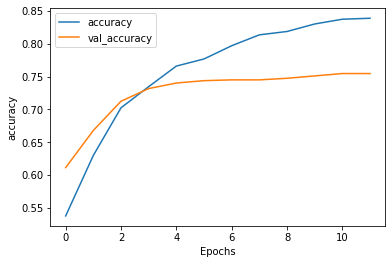

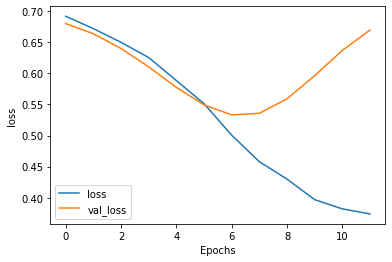

In [ ]:
plot_graphs(history_tune_binary, "accuracy")
plot_graphs(history_tune_binary, "loss")

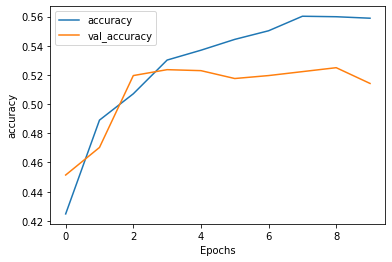

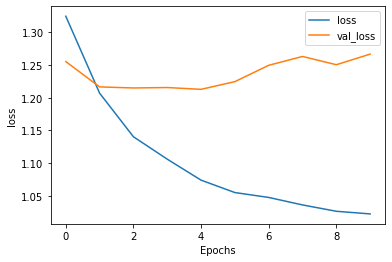

In [ ]:
plot_graphs(history_tune, "accuracy")
plot_graphs(history_tune, "loss")

In [ ]:
_, accuracy_binary = nn_tune_binary.evaluate(X_test_b, y_test_enc_b)
print('Accuracy: %.2f' % (accuracy_binary*100))

32/32 [==============================] - 0s 3ms/step - loss: 1.0239 - accuracy: 0.6100
Accuracy: 61.00


In [ ]:
_, accuracy = nn_tune.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

61/61 [==============================] - 0s 4ms/step - loss: 1.2781 - accuracy: 0.4596
Accuracy: 45.96


In [ ]:
from sklearn.metrics import f1_score
y_pred_binary= nn_tune_binary.predict(X_test_b)
y_pred_enc_binary =np.asarray(np.round(y_pred_binary)).astype(int)
f1_score(y_test_enc_b, y_pred_enc_binary, average="weighted")

0.6240912804866895

In [ ]:
from sklearn.metrics import f1_score
y_pred= nn_tune.predict(X_test)
y_pred_enc = [np.argmax(i) for i in y_pred]
f1_score(y_test_enc, y_pred_enc, average="weighted")

0.463671900833524

In [ ]:
from tensorflow import keras
nn_tune_binary.save('NeuralNetworks_2sent.sav')
nn_tune.save('NeuralNetworks_4sent.sav')

In [ ]:
import joblib
#joblib.dump(pipe, 'pipe.pkl')
#joblib.dump(pipe_b, 'pipe_b.pkl')

#joblib.dump(label_enc, 'label_enc.pkl')
#joblib.dump(label_enc_b, 'label_enc_b.pkl')

In [ ]:
pipe = joblib.load('pipe.pkl')
pipe_b = joblib.load('pipe_b.pkl')
label_enc= joblib.load('label_enc.pkl')
label_enc_b=joblib.load('label_enc_b.pkl')

In [ ]:
#!zip -r NeuralNetworks_2sent.zip NeuralNetworks_2sent.sav

In [ ]:
#!zip -r NeuralNetworks_4sent.zip NeuralNetworks_4sent.sav

In [ ]:
!unzip NeuralNetworks_2sent.zip
!unzip NeuralNetworks_4sent.zip

Archive:  NeuralNetworks_2sent.zip
   creating: NeuralNetworks_2sent.sav/
   creating: NeuralNetworks_2sent.sav/variables/
  inflating: NeuralNetworks_2sent.sav/variables/variables.index  
  inflating: NeuralNetworks_2sent.sav/variables/variables.data-00000-of-00001  
   creating: NeuralNetworks_2sent.sav/assets/
  inflating: NeuralNetworks_2sent.sav/saved_model.pb  
  inflating: NeuralNetworks_2sent.sav/keras_metadata.pb  
Archive:  NeuralNetworks_4sent.zip
   creating: NeuralNetworks_4sent.sav/
   creating: NeuralNetworks_4sent.sav/variables/
  inflating: NeuralNetworks_4sent.sav/variables/variables.index  
  inflating: NeuralNetworks_4sent.sav/variables/variables.data-00000-of-00001  
   creating: NeuralNetworks_4sent.sav/assets/
  inflating: NeuralNetworks_4sent.sav/saved_model.pb  
  inflating: NeuralNetworks_4sent.sav/keras_metadata.pb  


In [ ]:
from keras.models import load_model
nn_tune_binary = load_model('NeuralNetworks_2sent.sav')
nn_tune= load_model('NeuralNetworks_4sent.sav')

In [ ]:
X_test = pipe.transform(test_set)

In [ ]:
y_test_enc = label_enc.transform(test_set['sent'])

In [ ]:
X_test_b = pipe_b.transform(test_set_binary)

In [ ]:
y_test_enc_binary = label_enc_b.transform(test_set_binary['sent'])

In [ ]:
from sklearn.metrics import f1_score
y_pred_binary= nn_tune_binary.predict(X_test_b)
y_pred_enc_binary =np.asarray(np.round(y_pred_binary)).astype(int).ravel()
f1_score(y_test_enc_binary, y_pred_enc_binary , average="weighted")

0.6240912804866895

In [ ]:
from sklearn.metrics import f1_score
y_pred= nn_tune.predict(X_test)
y_pred_enc =[np.argmax(i) for i in y_pred]
f1_score(y_test_enc, y_pred_enc , average="weighted")

0.463671900833524

In [ ]:
letters_df_dict.keys()

dict_keys(['lettere di Puccini', 'lettere a Puccini', 'verbali consiglio vigilanza', 'verbali assemblea soci'])

In [ ]:
X_letters_dict = {}
X_letters_b_dict = {}

pred = {}
pred_b = {}
for key in letters_df_dict:
  X_letters_dict[key] = pipe.transform(letters_df_dict[key][['text']])
  X_letters_b_dict[key] = pipe_b.transform(letters_df_dict[key][['text']])

  label= nn_tune.predict(X_letters_dict[key])
  label_b = nn_tune_binary.predict(X_letters_b_dict[key] )
  
  sent_4 = [np.argmax(i) for i in label]
  sent_2 = np.asarray(np.round(label_b)).astype(int).ravel()


  letters_df_dict[key]['NeuralNetworks2_sent'] = sent_2
  letters_df_dict[key]['NeuralNetworks4_sent'] = sent_4

  letters_df_dict[key][['NeuralNetworks2_sent']] = letters_df_dict[key][['NeuralNetworks2_sent']].replace({0:"negative",1:"positive" })
  letters_df_dict[key][['NeuralNetworks4_sent']] = letters_df_dict[key][['NeuralNetworks4_sent']].replace({0:"negative", 1:"neutral",2:"positive", 3:"both"})

In [ ]:
for key in letters_df_dict:
  letters_df_dict[key].to_csv("NeuralNetworks_"+key+".csv")

<hr>

<br>
<br>

# Sentita Sentiment and Emotion Classifiers

<br>

In [ ]:
#%%capture
!pip install feel-it

     |████████████████████████████████| 1.9 MB 5.2 MB/s 
     |████████████████████████████████| 895 kB 58.6 MB/s 
     |████████████████████████████████| 3.3 MB 42.5 MB/s 


In [ ]:
from feel_it import SentimentClassifier
sentiment_classifier = SentimentClassifier()
from feel_it import EmotionClassifier
emotion_classifier = EmotionClassifier()

Downloading:   0%|          | 0.00/847 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/299 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/414 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/899 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/794k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.68M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/299 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/414 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/443M [00:00<?, ?B/s]

In [ ]:
from google.colab import files



for key in letters_list_dict:
  print("SENTIMENT:",key)
  sentiment = sentiment_classifier.predict(letters_list_dict[key])
  letters_df_dict[key]['SentITA'] = sentiment

  print("EMOTION:",key)
  emotion = emotion_classifier.predict(letters_list_dict[key])
  letters_df_dict[key]['SentITA_emotions'] = emotion

  letters_df_dict[key].to_csv("predictions_"+key+".csv")


SENTIMENT: lettere di Puccini
EMOTION: lettere di Puccini
SENTIMENT: lettere a Puccini
EMOTION: lettere a Puccini
SENTIMENT: verbali consiglio vigilanza
EMOTION: verbali consiglio vigilanza
SENTIMENT: verbali assemblea soci
EMOTION: verbali assemblea soci


In [ ]:
for key in letters_df_dict:
  files.download("predictions_"+key+".csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<hr>
<br>
<br>

# Model Results

<br>

In [ ]:
for key in letters_df_dict:
  print(key)
  git_key = key.replace(" ","%20")
  letters_df_dict[key]= pd.read_csv('https://raw.githubusercontent.com/Andreaierardi/sentiment-puccini/main/results/predictions_'+git_key+'.csv')
  letters_df_dict[key].anno = letters_df_dict[key].anno.fillna(0)
  letters_df_dict[key].anno = letters_df_dict[key].anno.astype("int").astype("string")
  letters_df_dict[key].anno =   letters_df_dict[key].anno.replace("0","unknown")

lettere di Puccini
lettere a Puccini
verbali consiglio vigilanza
verbali assemblea soci


In [ ]:
def generate_all_sentiment_plots(df, pdf_name = ""):

  plots = []
  for name in ['SentITA', 'NeuralNetworks2_sent']:
    sent_agg = df.groupby(by= name).size().sort_values( ascending=False)
    plots.append(plot_freq(sent_agg.index,sent_agg.values,title=pdf_name+" "+name))
    letters_sent_year  = df.groupby(['anno', name],as_index = True).agg('text').count()
    letters_sent_year = letters_sent_year.unstack(fill_value=0).stack().reset_index()
    x= letters_sent_year[letters_sent_year[name] == 'positive'][0]
    if len(x)<= 0:
     x = [0 for i in x2] 
    x2 = letters_sent_year[letters_sent_year[name] == 'negative'][0]
    plots.append(year_plot_sent(x = x, x2 = x2,df = letters_sent_year, title=pdf_name+" "+name))
  for name2 in ['SentITA_emotions','NeuralNetworks4_sent']:
    if name2 == 'NeuralNetworks4_sent':
      types=["positive","negative","neutral","both"]
    else:
      types = ["joy","fear","sadness","anger"]
    emo_agg = df.groupby(by=name2).size().sort_values( ascending=False)
    plots.append(plot_freq(emo_agg.index, emo_agg.values, title=pdf_name+" "+name2))
    letters_emo_year  = df.groupby(['anno', name2],as_index = True).count().unstack(fill_value=0).stack()['text'].reset_index()
   
    x = letters_emo_year[letters_emo_year[name2] == types[0]]['text']
    x2 = letters_emo_year[letters_emo_year[name2] == types[1]]['text']
    x3 = letters_emo_year[letters_emo_year[name2] == types[2]]['text']
    x4 = letters_emo_year[letters_emo_year[name2] == types[3]]['text']

    if len(x)<=0:
      x = [0 for i in x2]
    if len(x4)<=0:
      x4= [0 for i in x2]
    plots.append(year_plot_emo(x,x2,x3,x4,df = letters_sent_year,title=pdf_name+" "+name2, names = types ))
 
  fig, ax = plt.subplots(figsize =(24, 9))
  notin = df[df['NeuralNetworks2_sent'] != df['SentITA']]
  notin_fraq = (notin.groupby("anno").size() / df.groupby("anno").size()*100).dropna()
  plt.bar(notin_fraq.index.astype("string"),notin_fraq.values)
  plt.title(pdf_name+" Percentage of discordance")
  plots.append(fig)
  grouped = df.groupby(["NeuralNetworks2_sent","SentITA"]).count()["text"]
  grouped = grouped.sort_values(ascending=False)
  grouped.index = grouped.reset_index()["NeuralNetworks2_sent"] +"_"+ grouped.reset_index()["SentITA"]
  plots.append(plot_freq(grouped.index,grouped.values, title=pdf_name+" Number of different and same predicted sentiments"))


  with PdfPages(f'{pdf_name}.pdf') as pdf:
        for p in plots:      
            try:
              fig=p.get_figure()
           
              pdf.savefig(p,bbox_inches='tight')
            except:
              print("WRONG PLOT:",exp.index(p))

  return plots

In [ ]:
def plot_freq(names,counts, title = ""):
  fig, ax = plt.subplots(figsize =(24, 9))

  name = names#emo_agg.index
  count = counts #emo_agg.values
  # Horizontal Bar Plot
  ax.barh(name, count)
  
  # Remove axes splines
  for s in ['top', 'bottom', 'left', 'right']:
      ax.spines[s].set_visible(False)
  
  # Remove x, y Ticks
  ax.xaxis.set_ticks_position('none')
  ax.yaxis.set_ticks_position('none')
  
  # Add padding between axes and labels
  ax.xaxis.set_tick_params(pad = 5)
  ax.yaxis.set_tick_params(pad = 10)
  
  # Add x, y gridlines
  ax.grid(b = True, color ='grey',
          linestyle ='-.', linewidth = 0.5,
          alpha = 0.2)
  
  # Show top values
  ax.invert_yaxis()
  
  # Add annotation to bars
  for i in ax.patches:
      plt.text(i.get_width()+0.2, i.get_y()+0.5,
              str(round((i.get_width()), 2)),
              fontsize = 20, fontweight ='bold',
              color ='grey')
  # Add Plot Title
  if title=="":
    ax.set_title('Distribution of predicted emotion',
                loc ='left', )
  else:
    ax.set_title(title,
                loc ='left', )
  # Show Plot
  plt.show()

  return fig

In [ ]:

def add_value_labels(ax, spacing=5):
    """Add labels to the end of each bar in a bar chart.

    Arguments:
        ax (matplotlib.axes.Axes): The matplotlib object containing the axes
            of the plot to annotate.
        spacing (int): The distance between the labels and the bars.
    """

    # For each bar: Place a label
    for rect in ax.patches:
        # Get X and Y placement of label from rect.
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2

        # Number of points between bar and label. Change to your liking.
        space = spacing
        # Vertical alignment for positive values
        va = 'bottom'

        # If value of bar is negative: Place label below bar
        if y_value < 0:
            # Invert space to place label below
            space *= -1
            # Vertically align label at top
            va = 'top'

        # Use Y value as label and format number with one decimal place
        label = str(y_value)

        # Create annotation
        ax.annotate(
            label,                      # Use `label` as label
            (x_value, round(y_value)),         # Place label at end of the bar
            xytext=(0, space),          # Vertically shift label by `space`
            textcoords="offset points", # Interpret `xytext` as offset in points
            ha='center',                # Horizontally center label
            va=va,fontsize=15
            )                      # Vertically align label differently for
                                        # positive and negative values.


In [ ]:
def year_plot_sent(x,x2,df, title=""):
  barWidth = 0.25
  fig, ax = plt.subplots(figsize =(24, 9))

  pos = x#letters_sent_year[letters_sent_year['sentiment_sentita'] == 'positive']['text']  
  neg = x2#letters_sent_year[letters_sent_year['sentiment_sentita'] == 'negative']['text']
  br1 = np.arange(len(neg))
  br2 = [x + barWidth for x in br1]
  #br3 = [x + barWidth for x in br2]
  t = plt.bar(br1, neg, color ='b', width = barWidth,
          edgecolor ='grey', label ='Negative')
  plt.bar(br2, pos, color ='r', width = barWidth,
          edgecolor ='grey', label ='Positive')

  #plt.bar(br3, CSE, color ='b', width = barWidth,
  #        edgecolor ='grey', label ='CSE')


  # Adding Xticks
  plt.xlabel('Year', fontweight ='bold', fontsize = 15)
  plt.ylabel('Numero di lettere con sentiment positivo/negativo', fontweight ='bold', fontsize = 15)
  plt.xticks([r + barWidth for r in range(len(pos))],
          df.anno.unique())


  if title != "":
    plt.title(title)
  # Call the function above. All the magic happens there.
  add_value_labels(ax)
  plt.legend()
  plt.show()

  return fig

In [ ]:
def year_plot_emo(x,x2,x3,x4, df, title="",names = None):
  barWidth = 0.20
  fig, ax = plt.subplots(figsize =(24, 9))

  joy = x 
  fear = x2
  sadness = x3
  anger = x4

  if names is None:
    names = []
    names.append('Joy')
    names.append('Fear')
    names.append('Sadness')
    names.append('Anger')
  else:
    names = names
  br1 = np.arange(len(joy))
  br2 = [x + barWidth for x in br1]
  br3 = [x + barWidth for x in br2]
  br4 = [x + barWidth for x in br3]

  plt.bar(br1, joy, color ='yellow', width = barWidth,
          edgecolor ='grey', label =names[0])
  plt.bar(br2, fear, color ='gray', width = barWidth,
          edgecolor ='grey', label =names[1])
  plt.bar(br3, sadness, color ='b', width = barWidth,
          edgecolor ='grey', label =names[2])
  plt.bar(br4, anger, color ='r', width = barWidth,
        edgecolor ='grey', label =names[3])

  
  # Adding Xticks
  plt.xlabel('Year', fontweight ='bold', fontsize = 15)
  plt.ylabel('Number of {}/{}/{}/{} letters'.format(names[0],names[1],names[2],names[3]), fontweight ='bold', fontsize = 15)
  plt.xticks([r + barWidth for r in range(len(df.anno.unique()))],
          df.anno.unique())
  if title!="":
    plt.title(title)
  # Call the function above. All the magic happens there.
  add_value_labels(ax)
  plt.legend()
  plt.show()

  return fig

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages


In [ ]:
letters_df_dict.keys()

dict_keys(['lettere di Puccini', 'lettere a Puccini', 'verbali consiglio vigilanza', 'verbali assemblea soci'])

lettere di Puccini


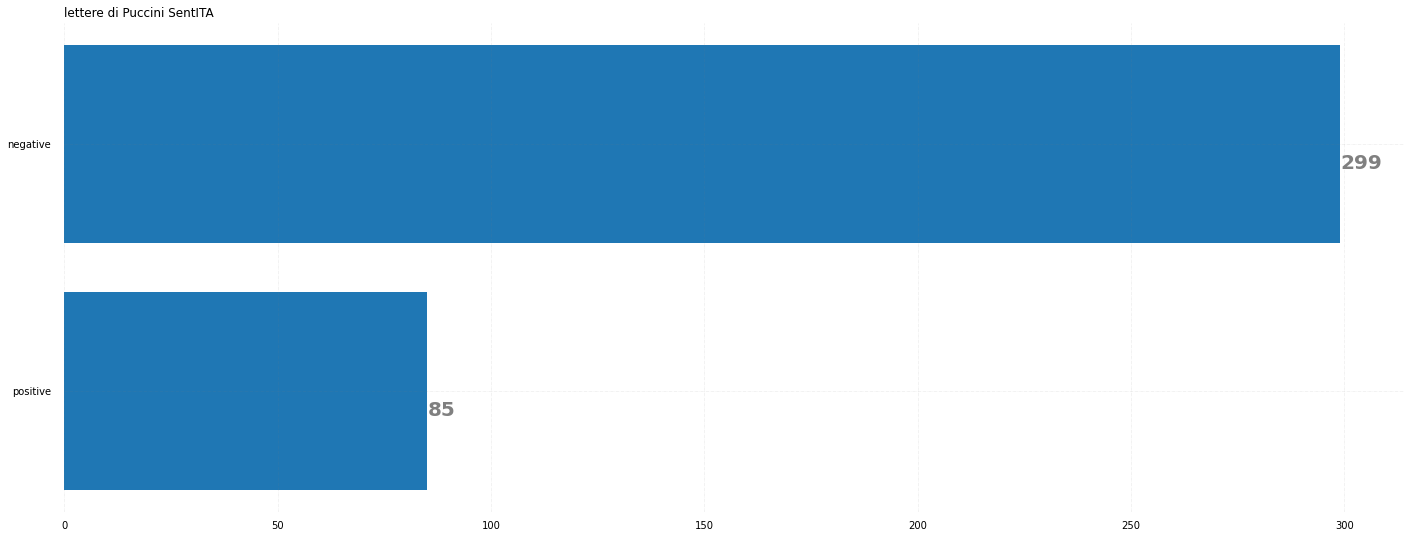

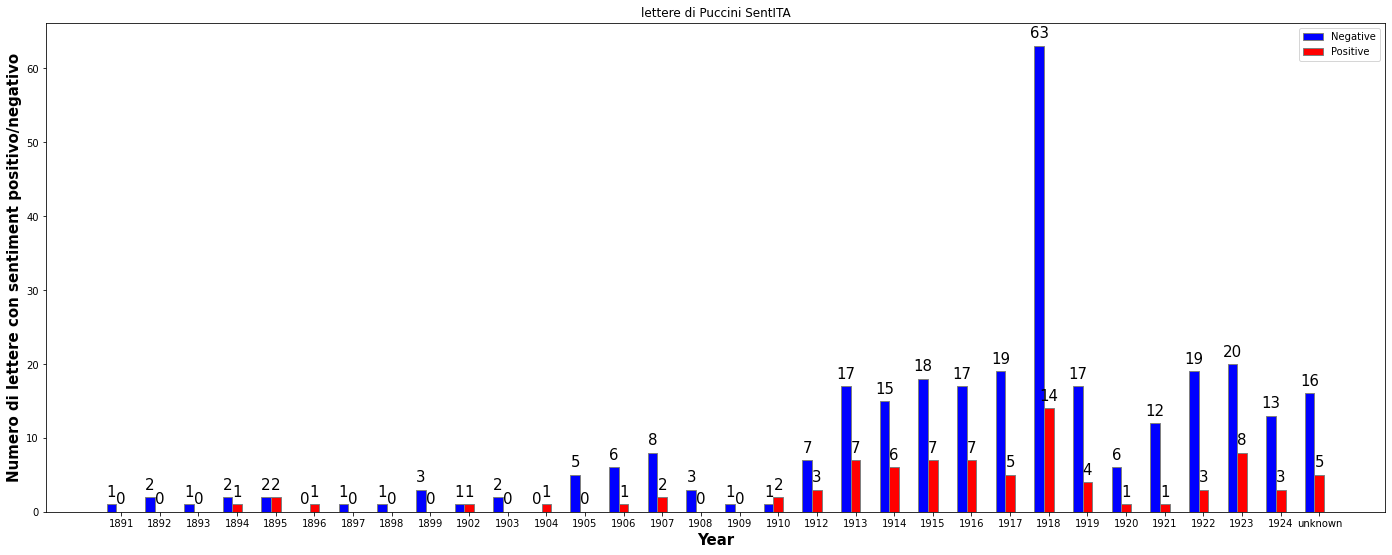

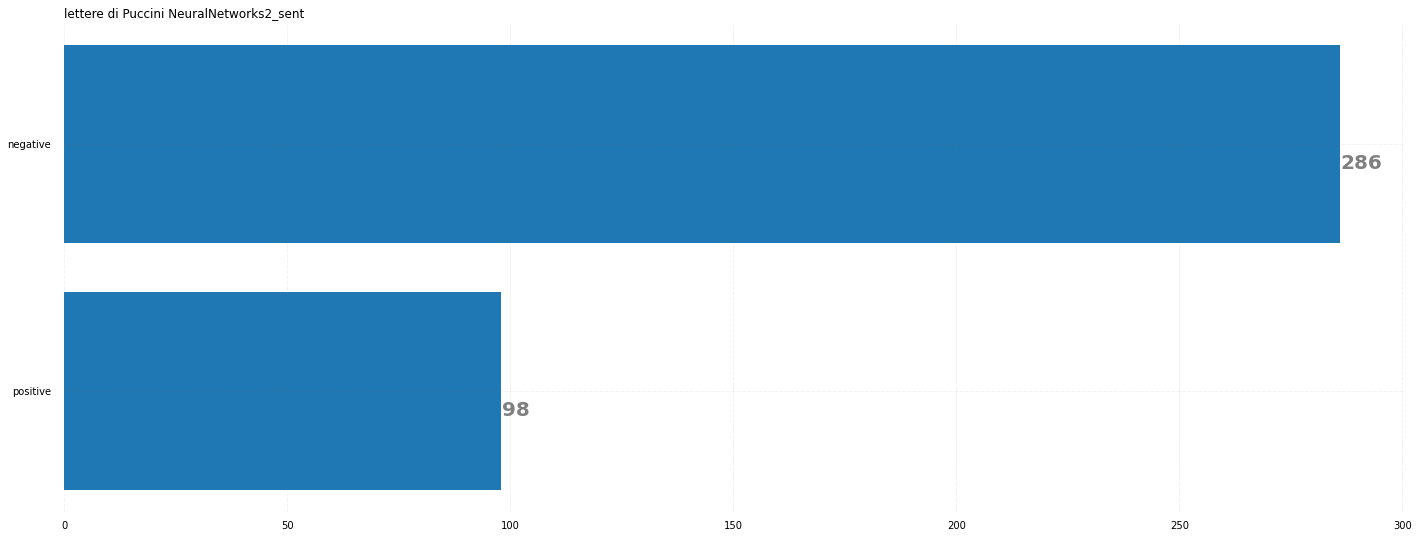

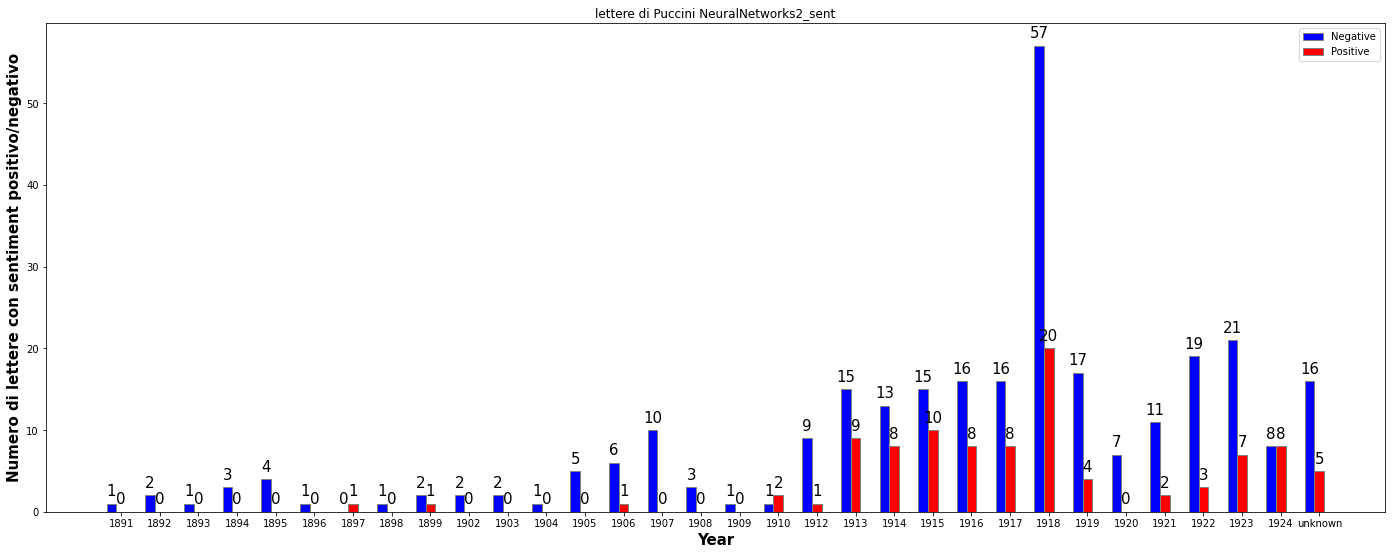

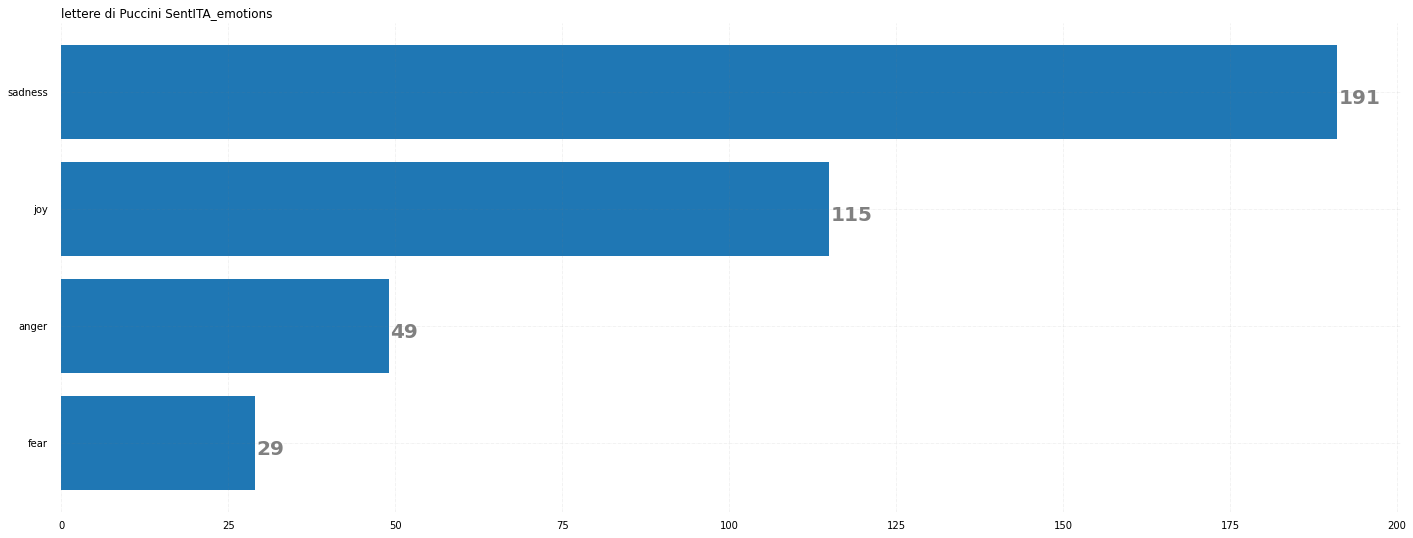

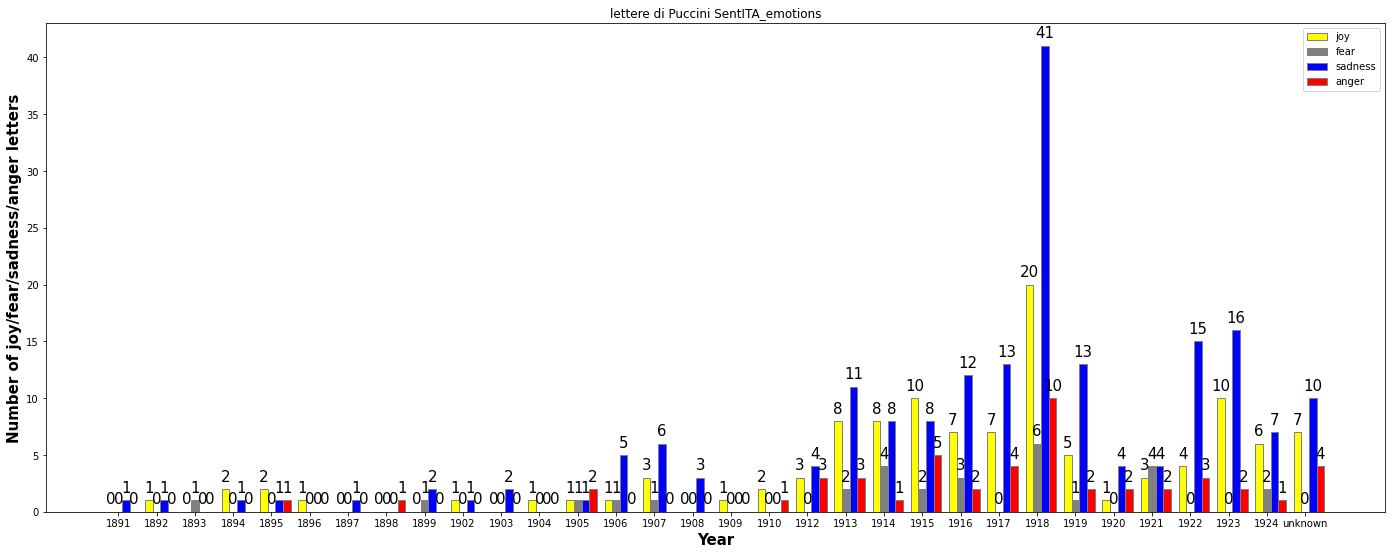

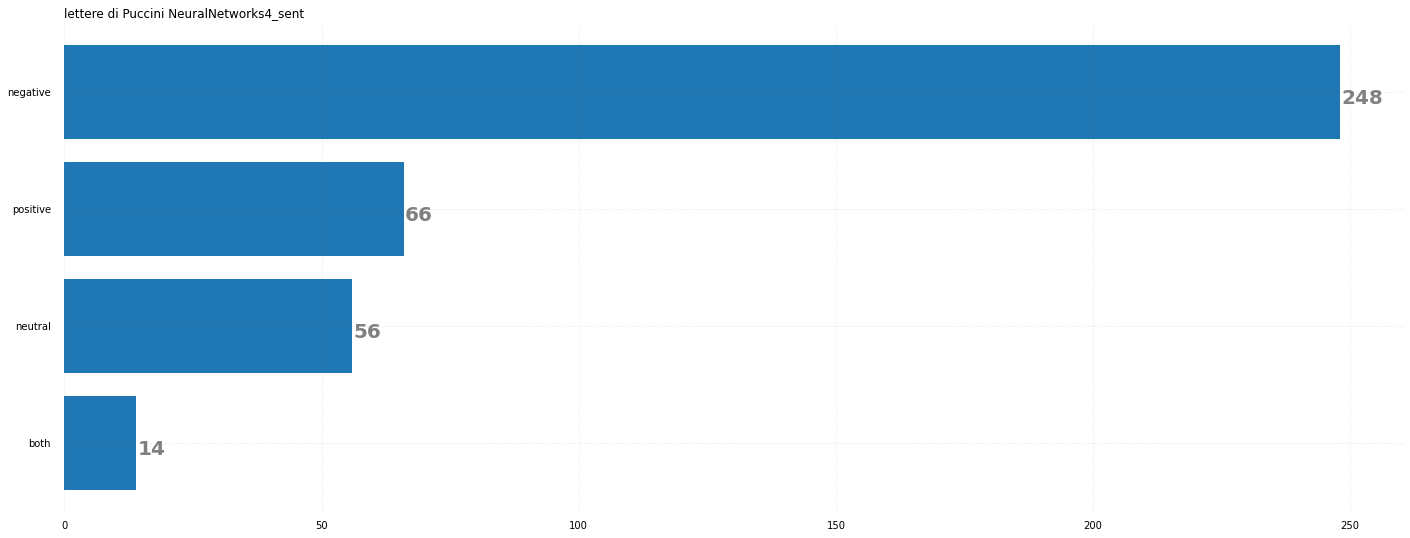

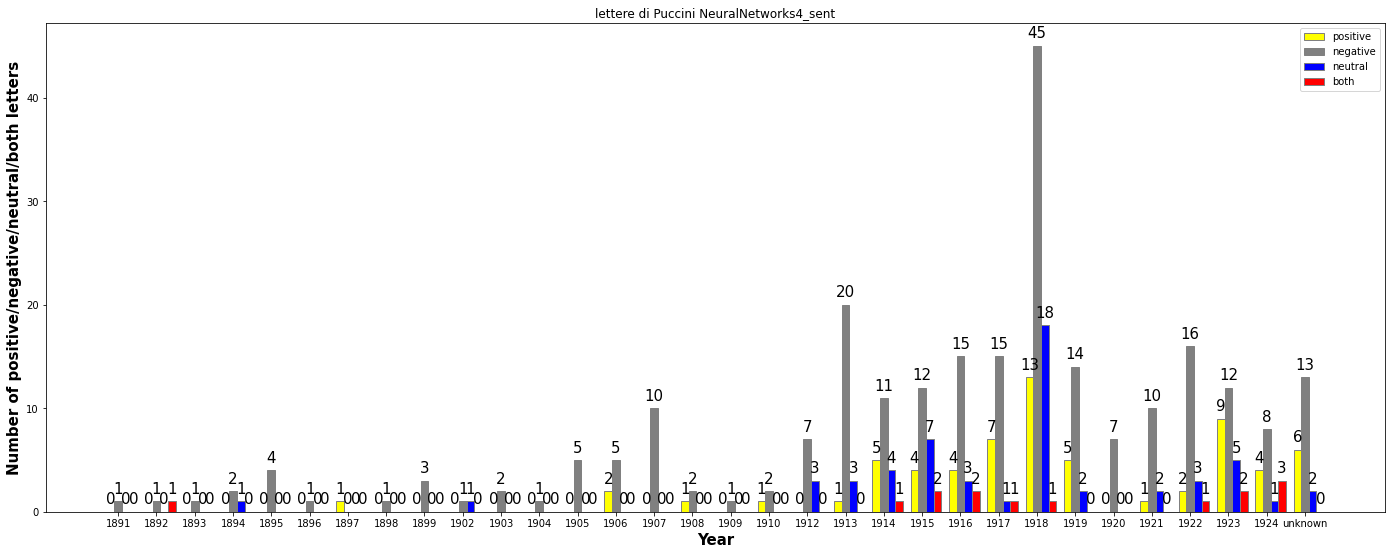

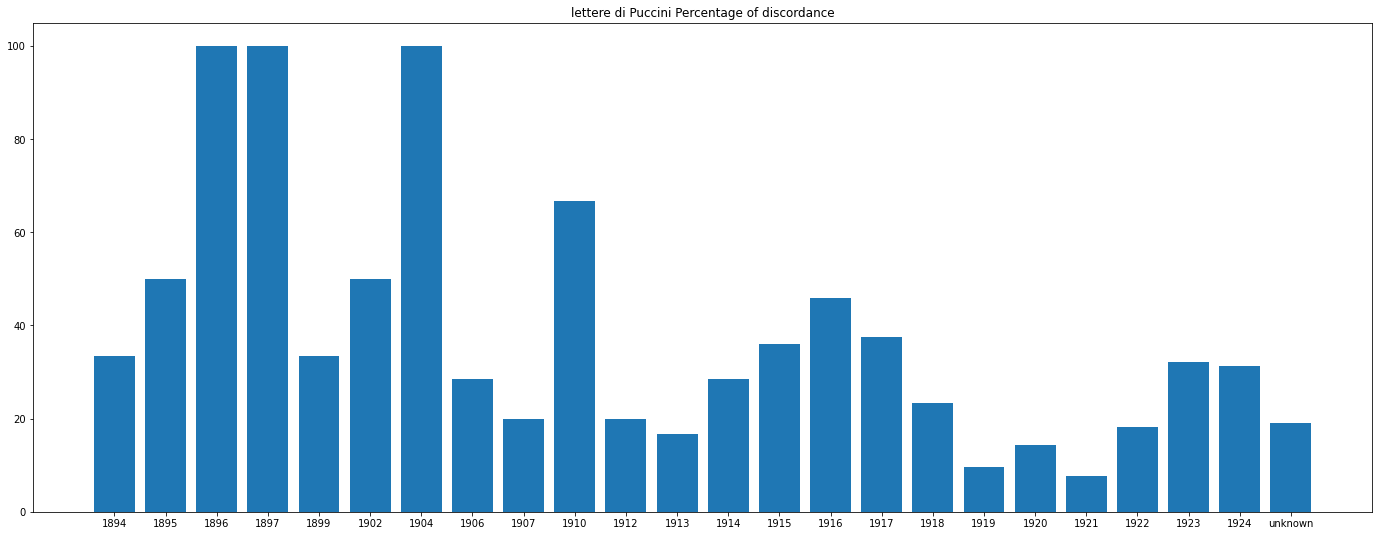

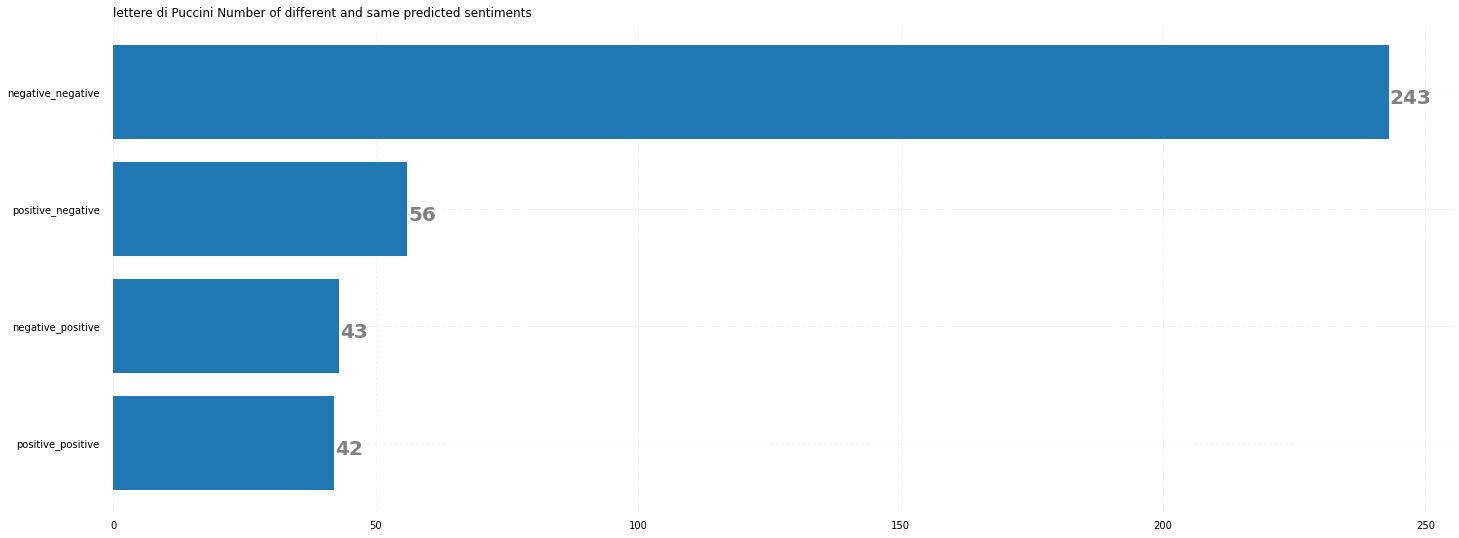

lettere a Puccini


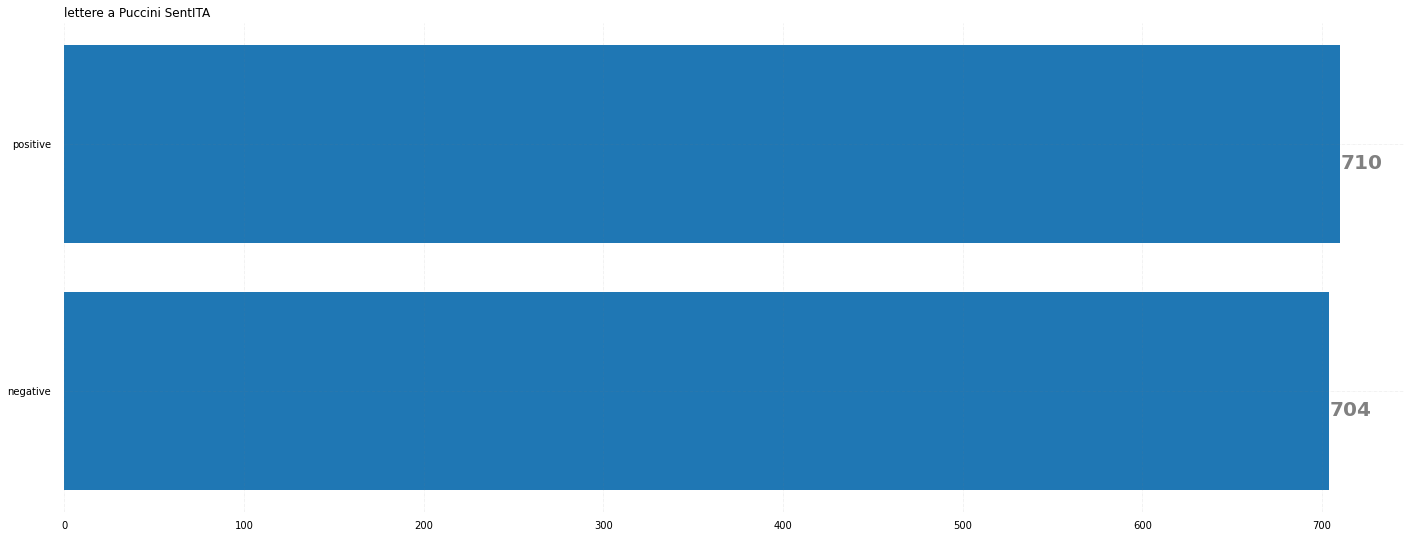

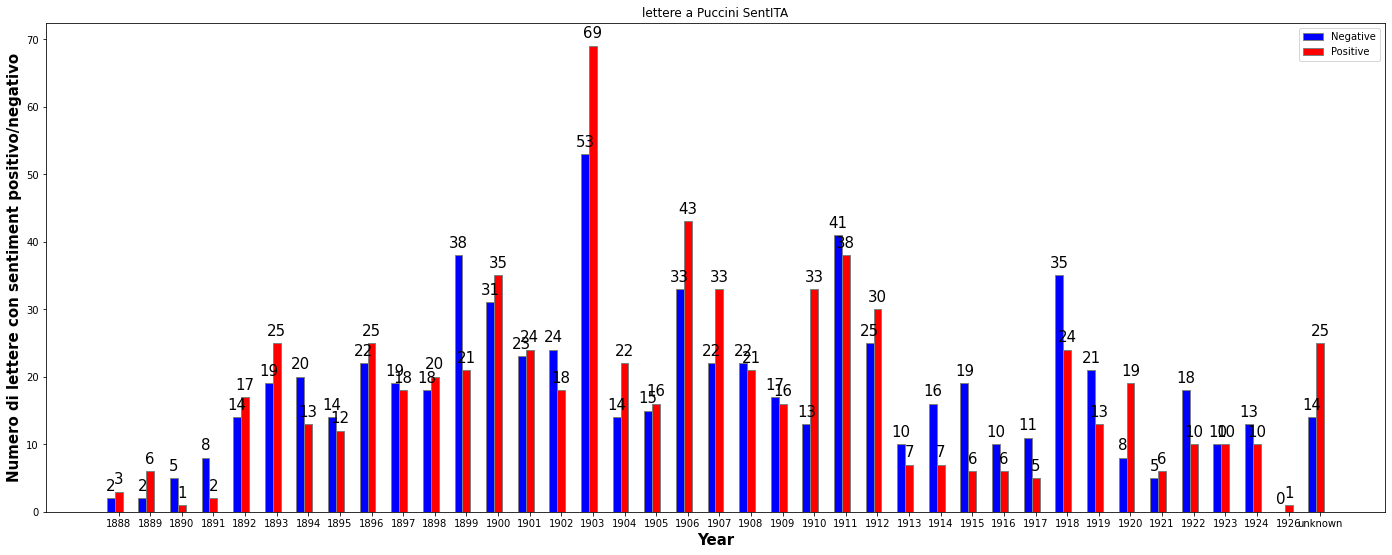

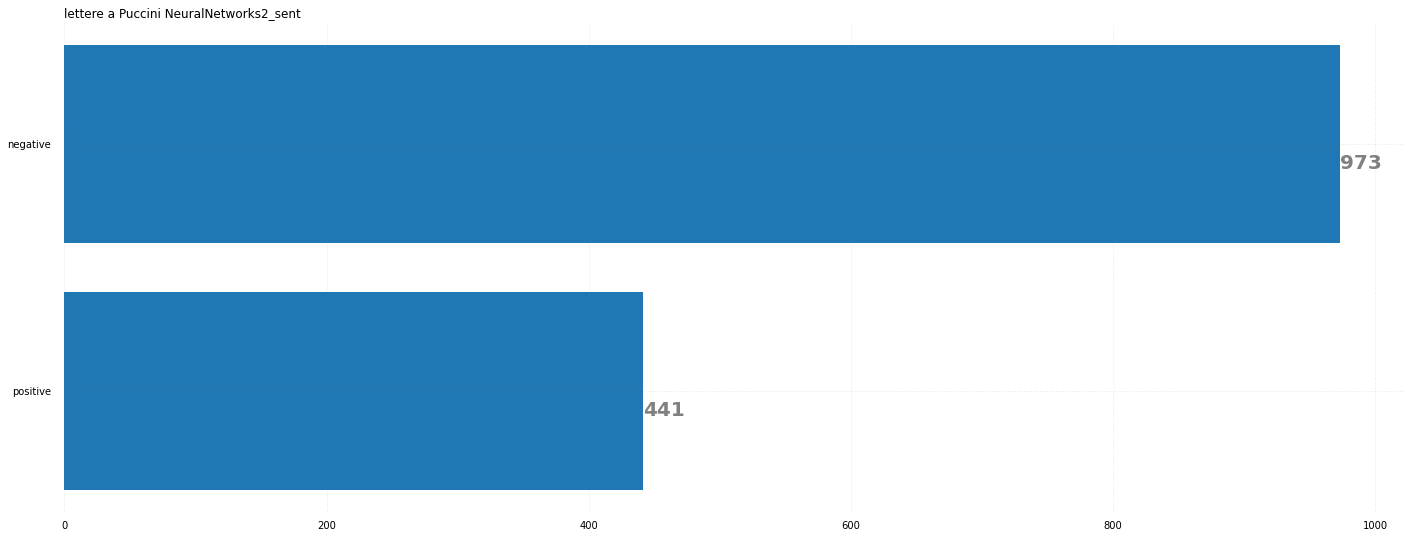

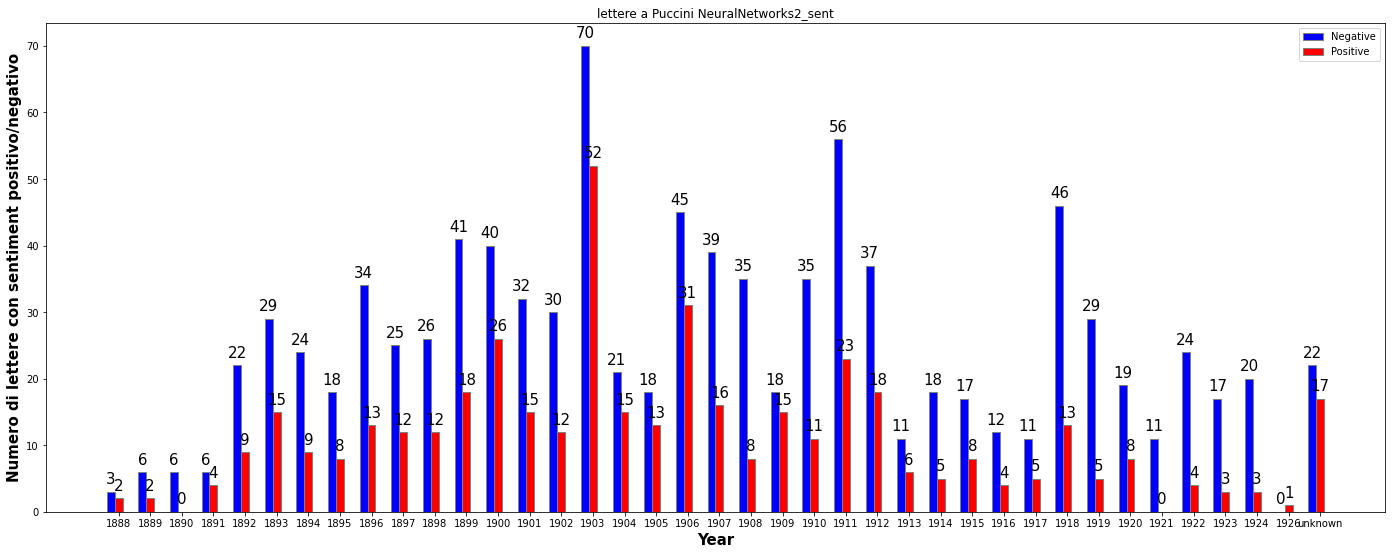

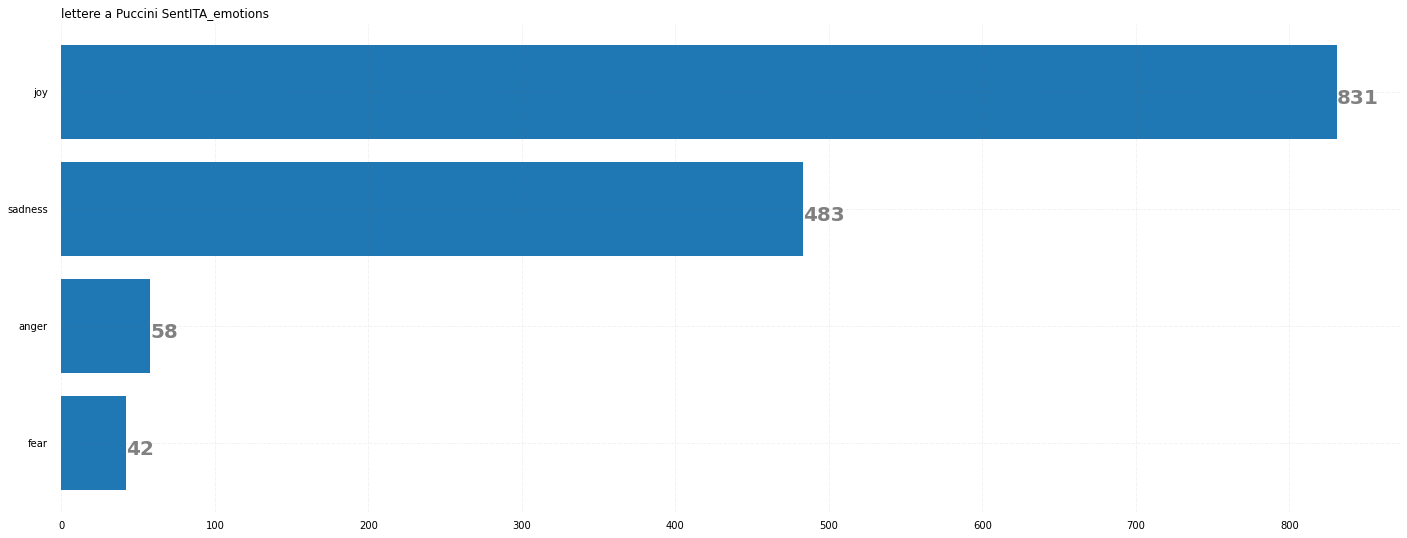

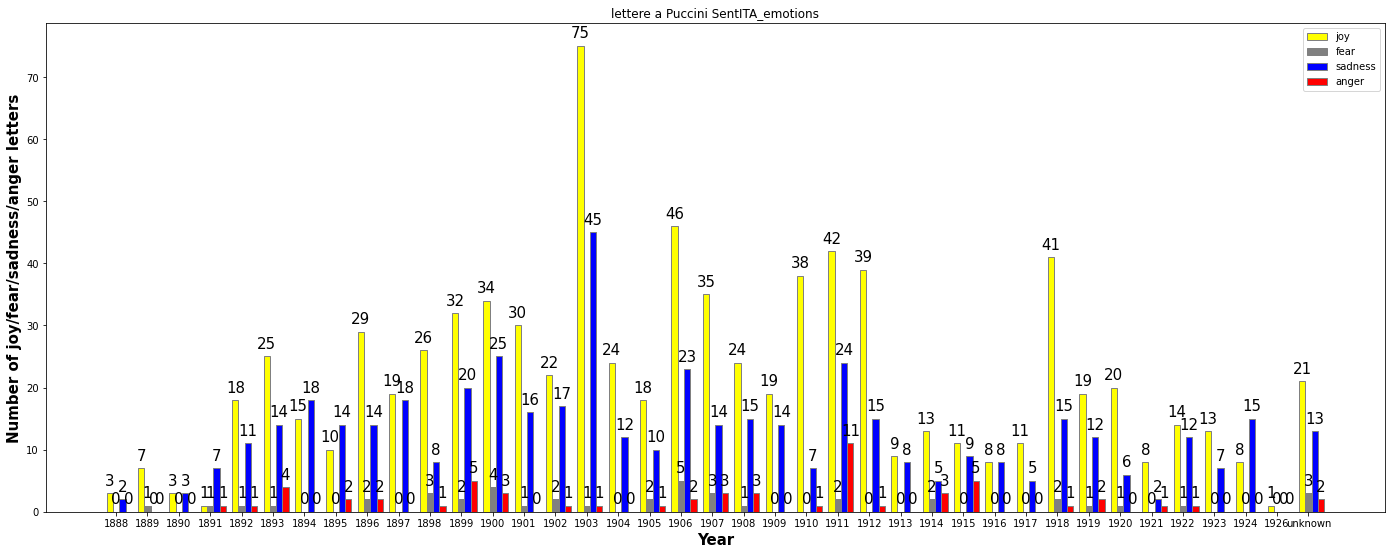

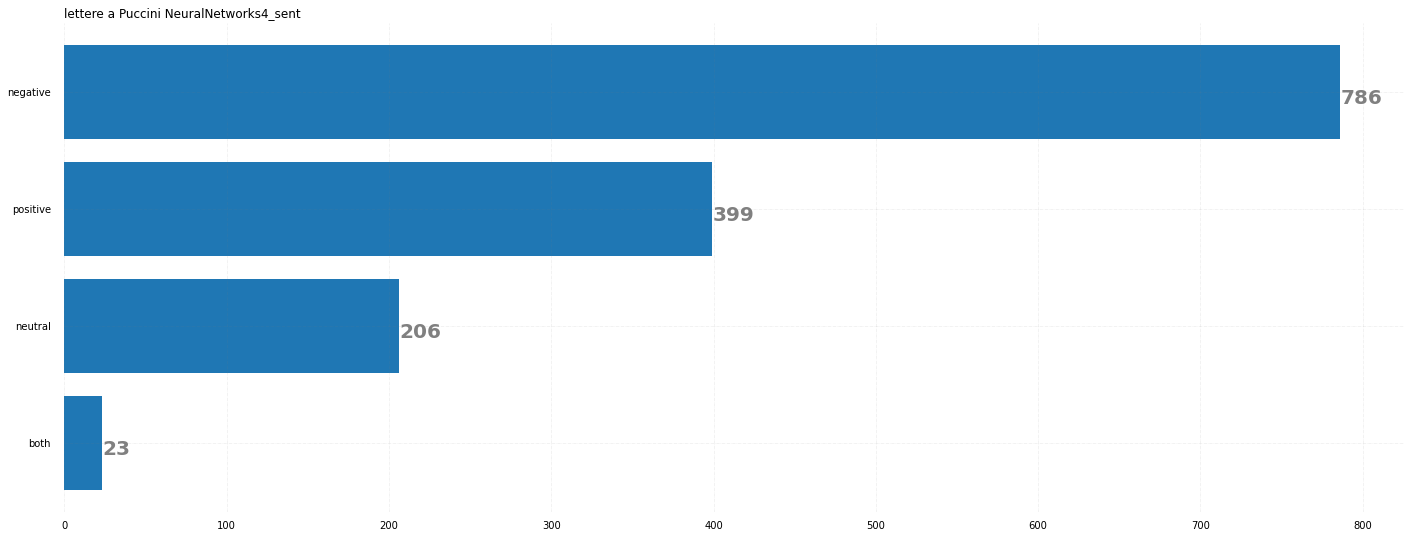

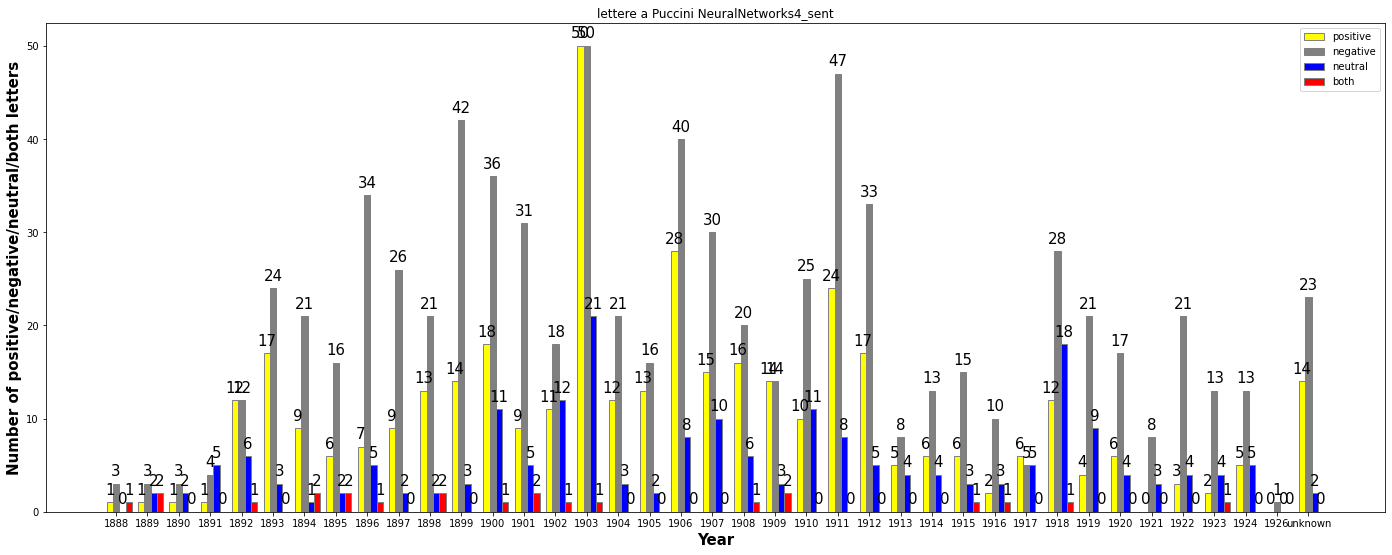

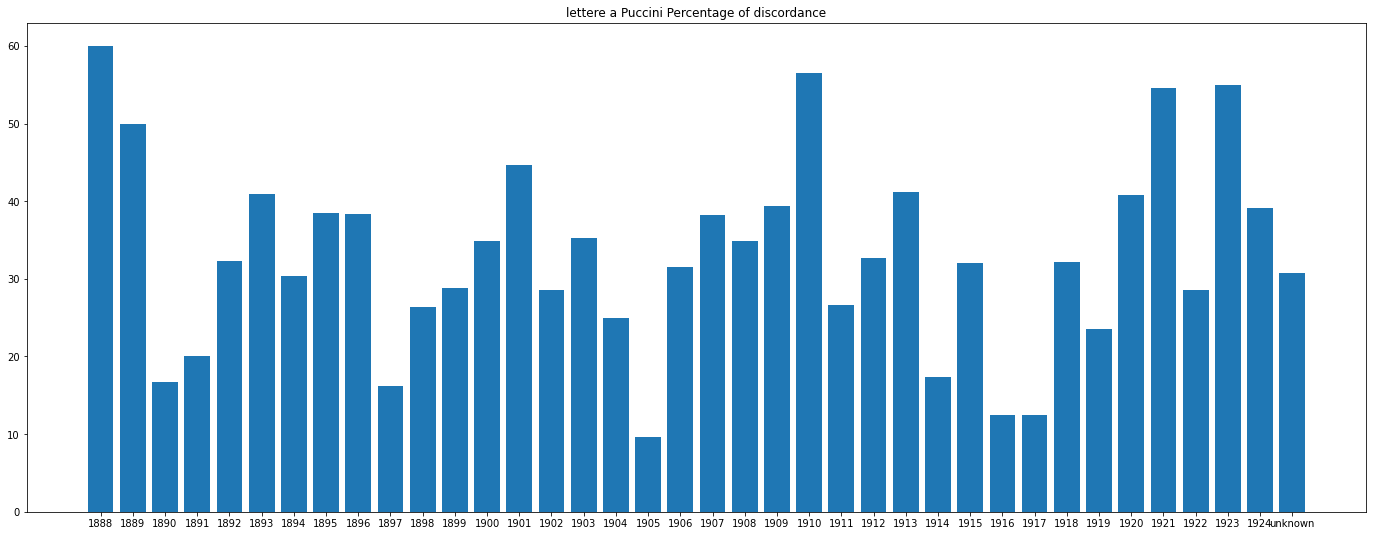

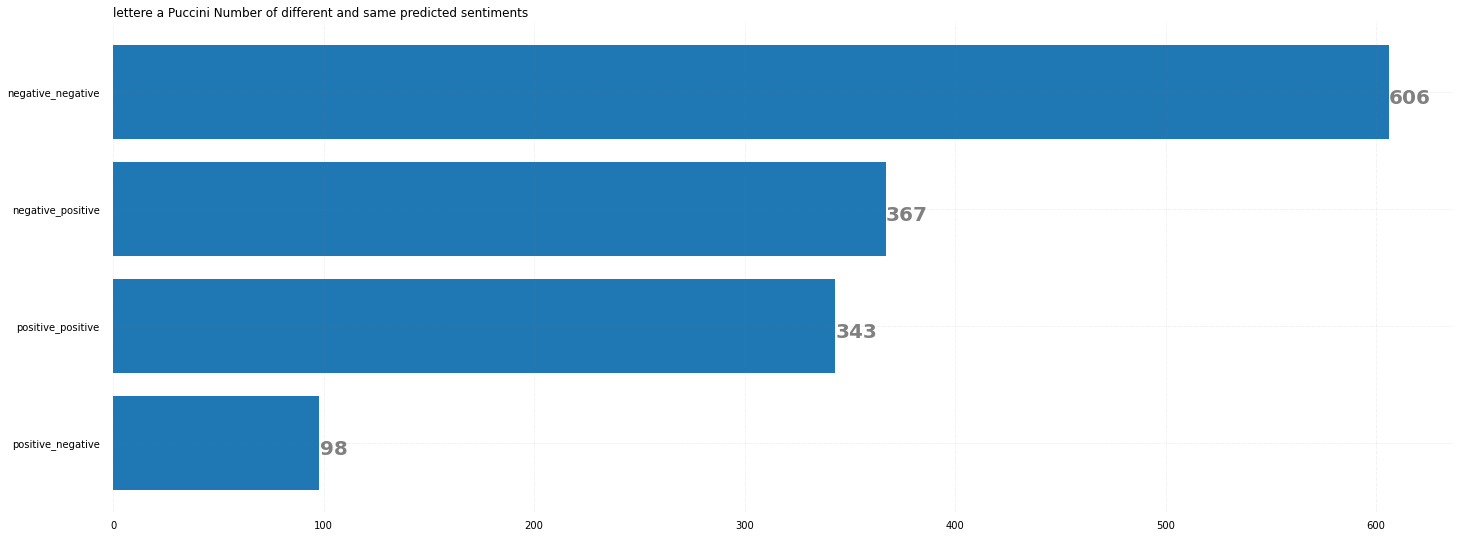

verbali consiglio vigilanza


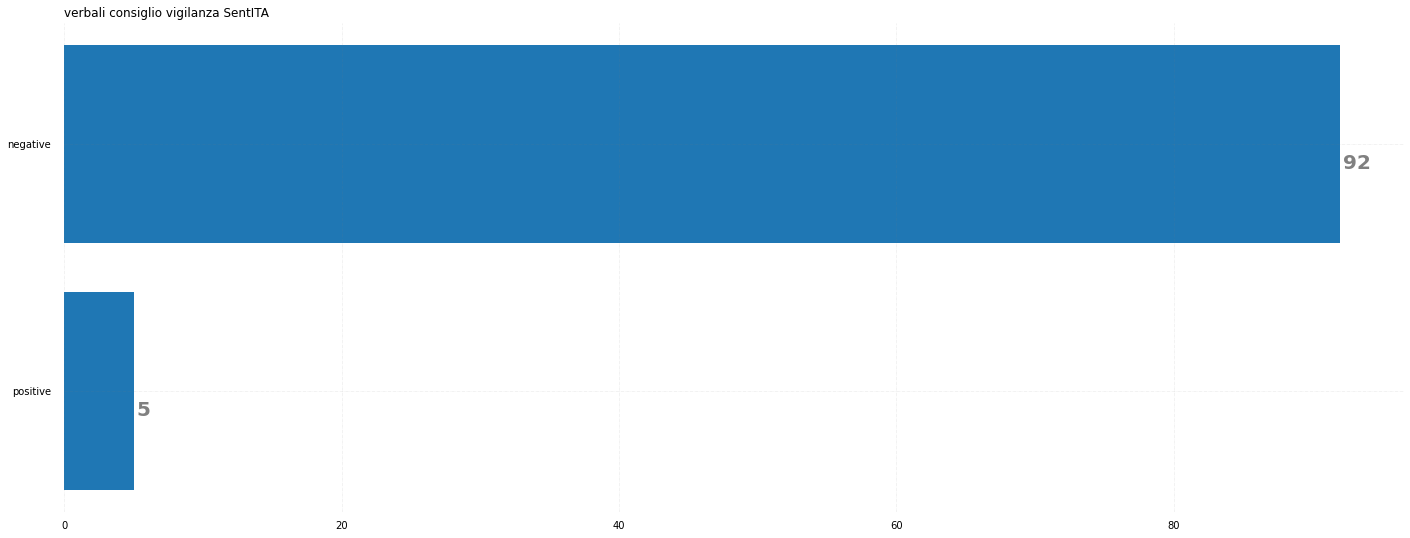

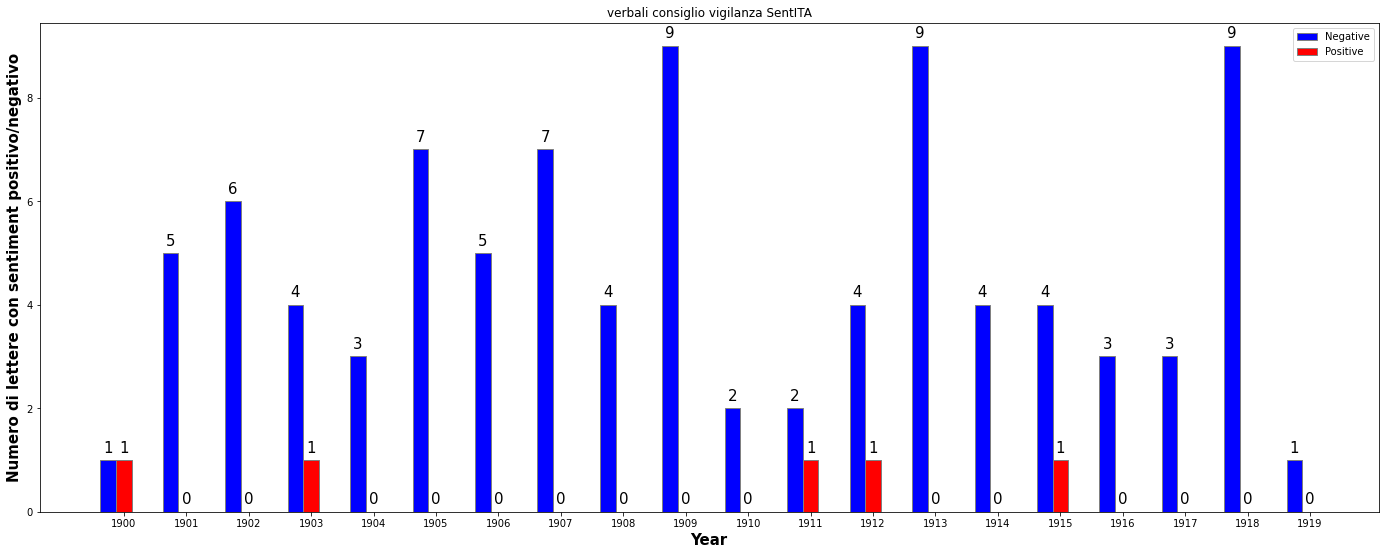

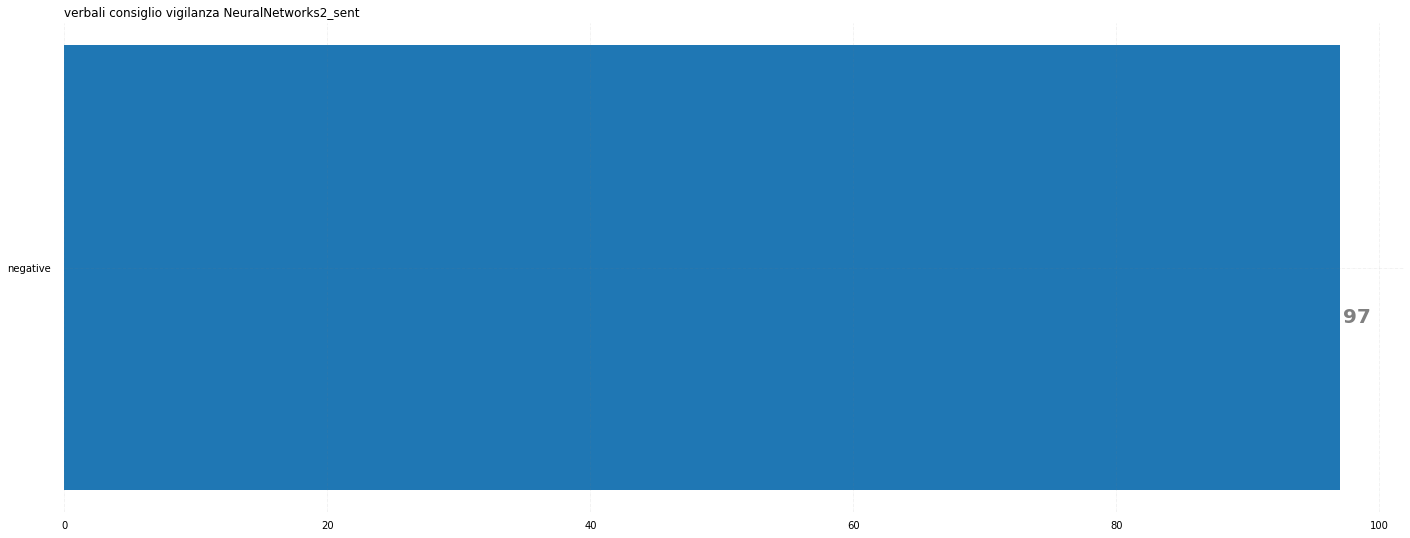

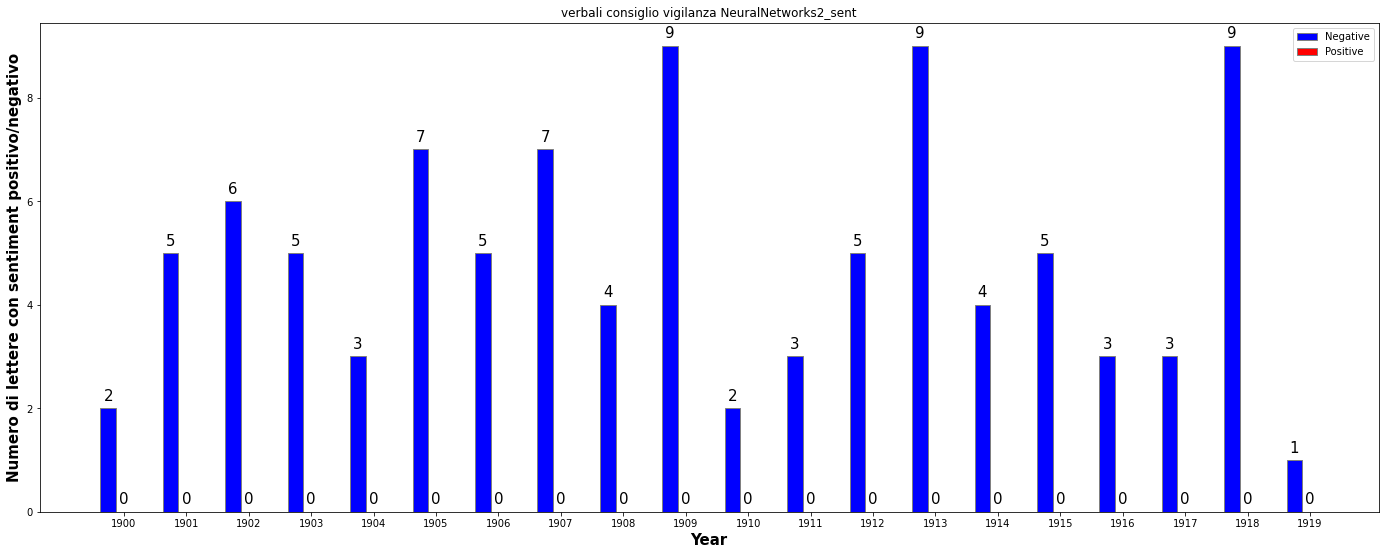

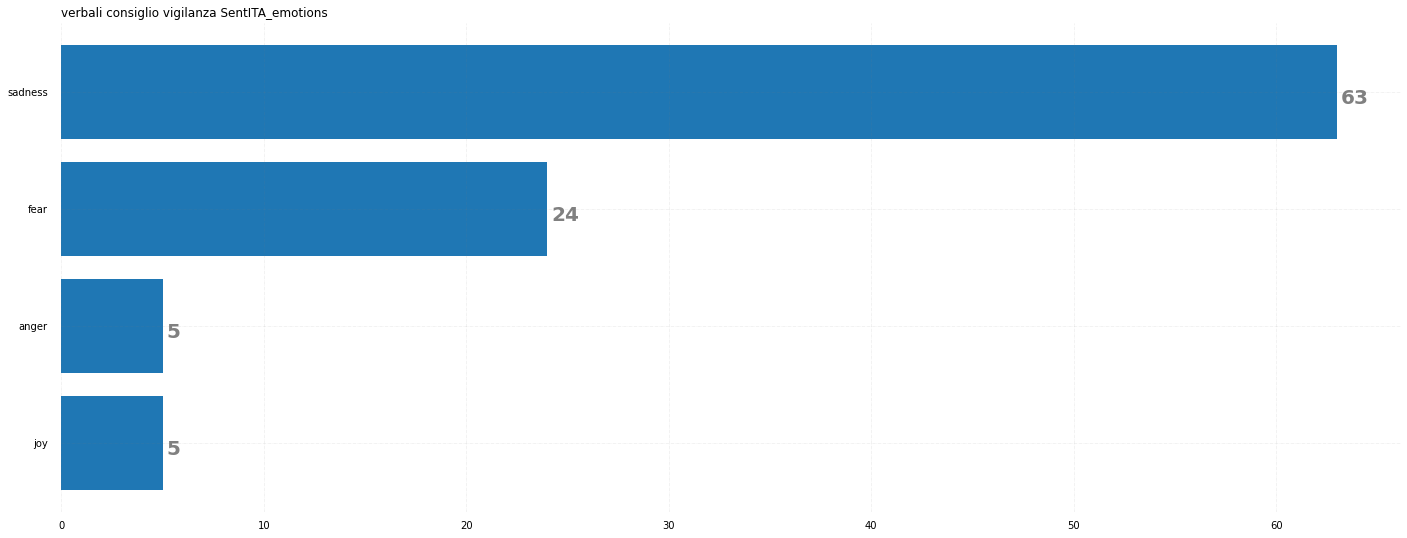

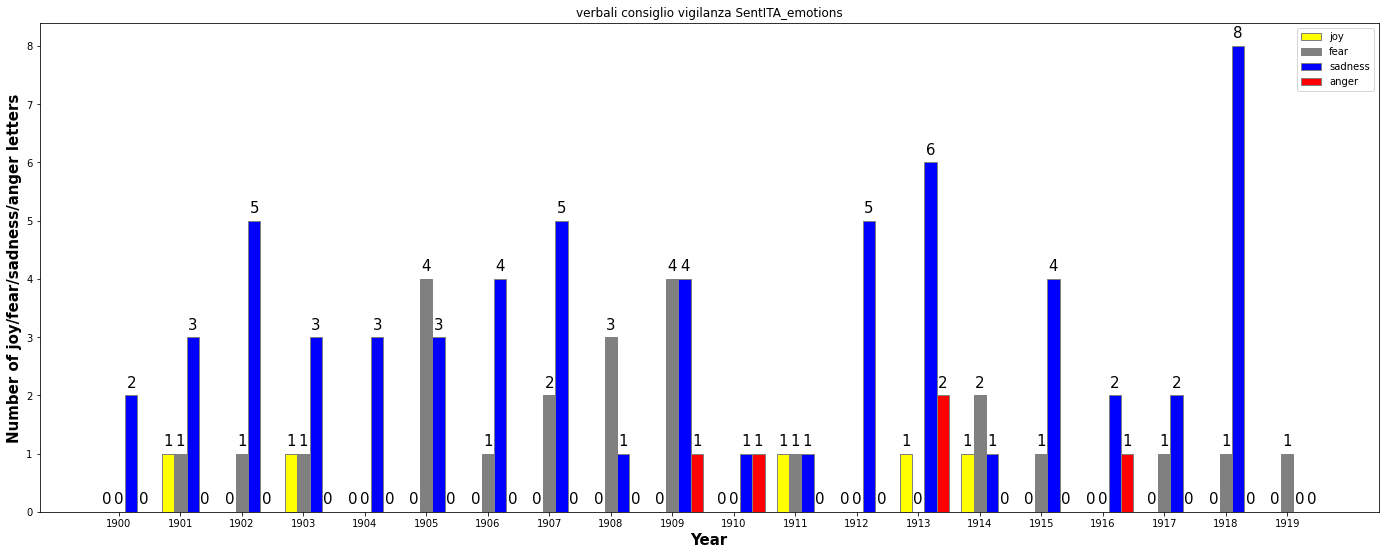

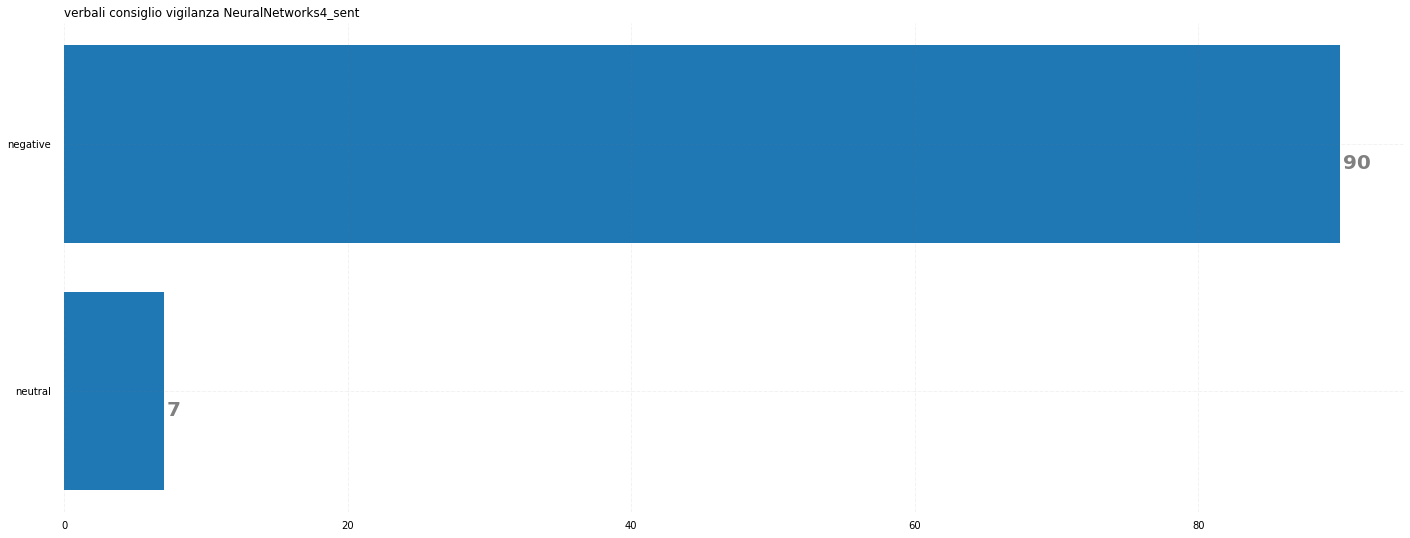

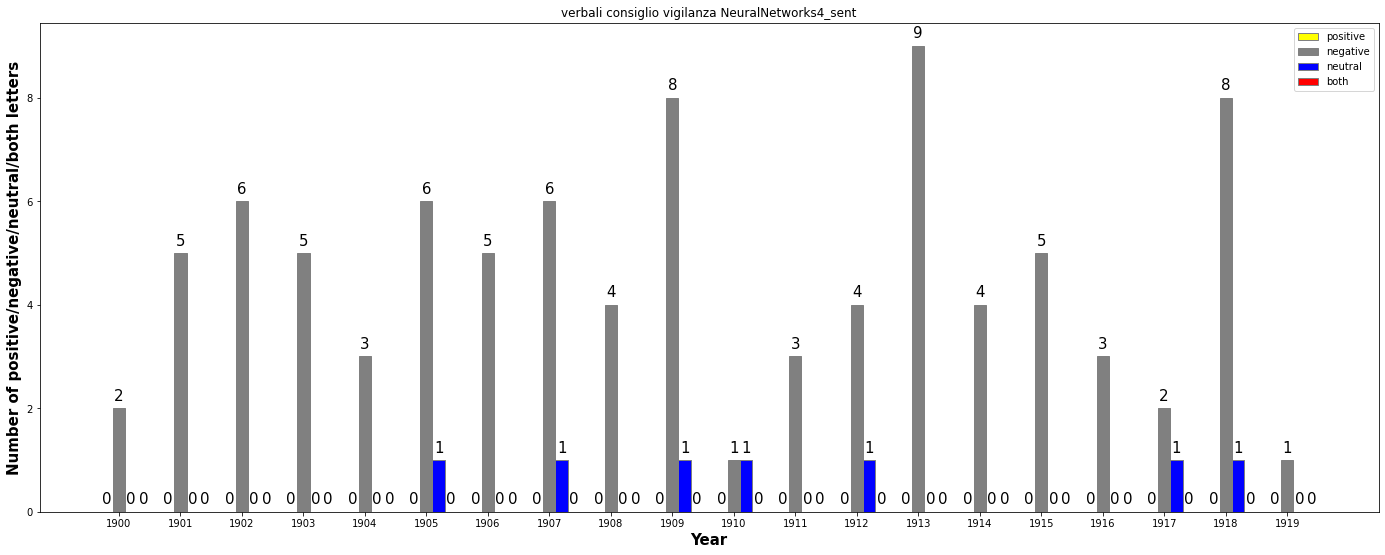

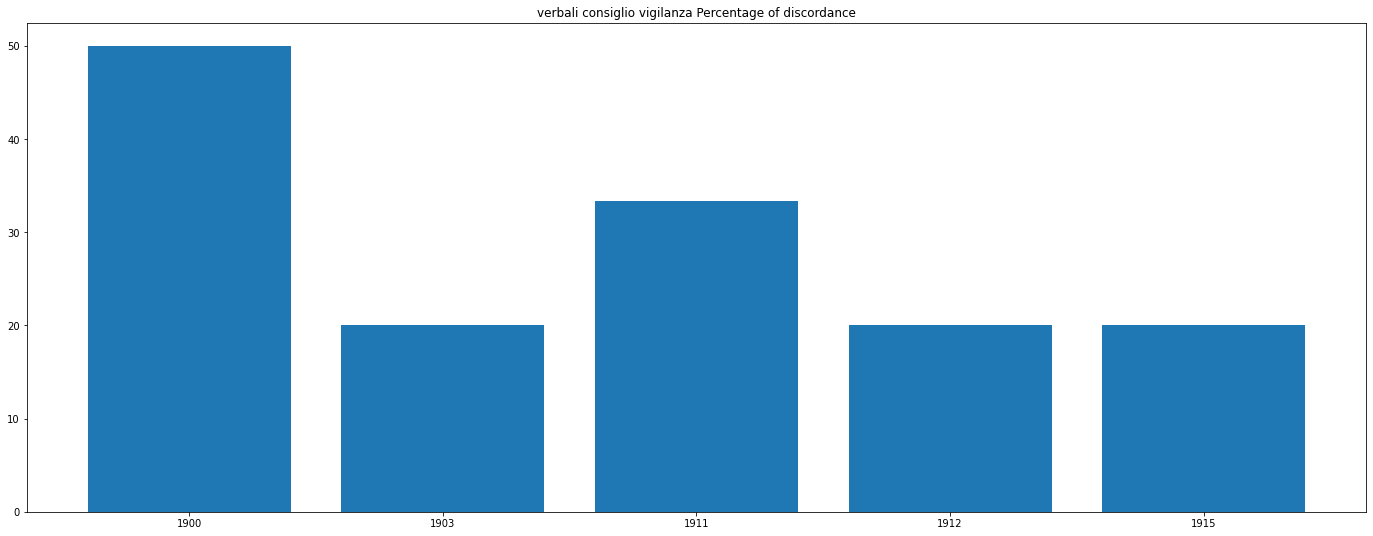

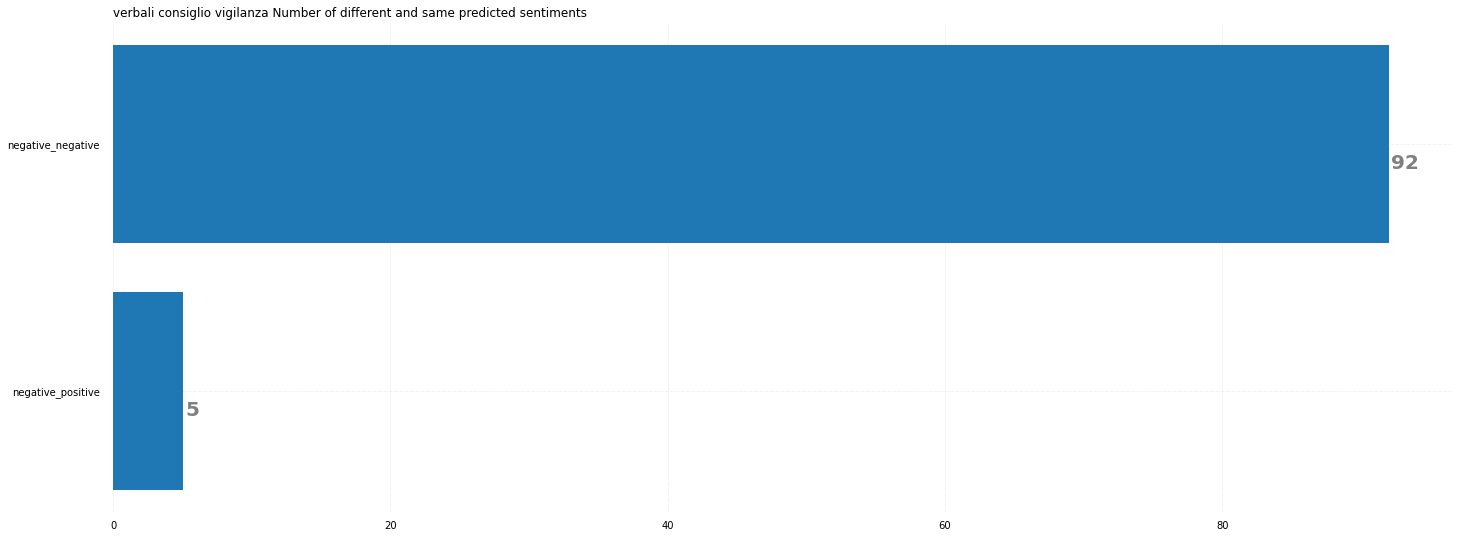

verbali assemblea soci


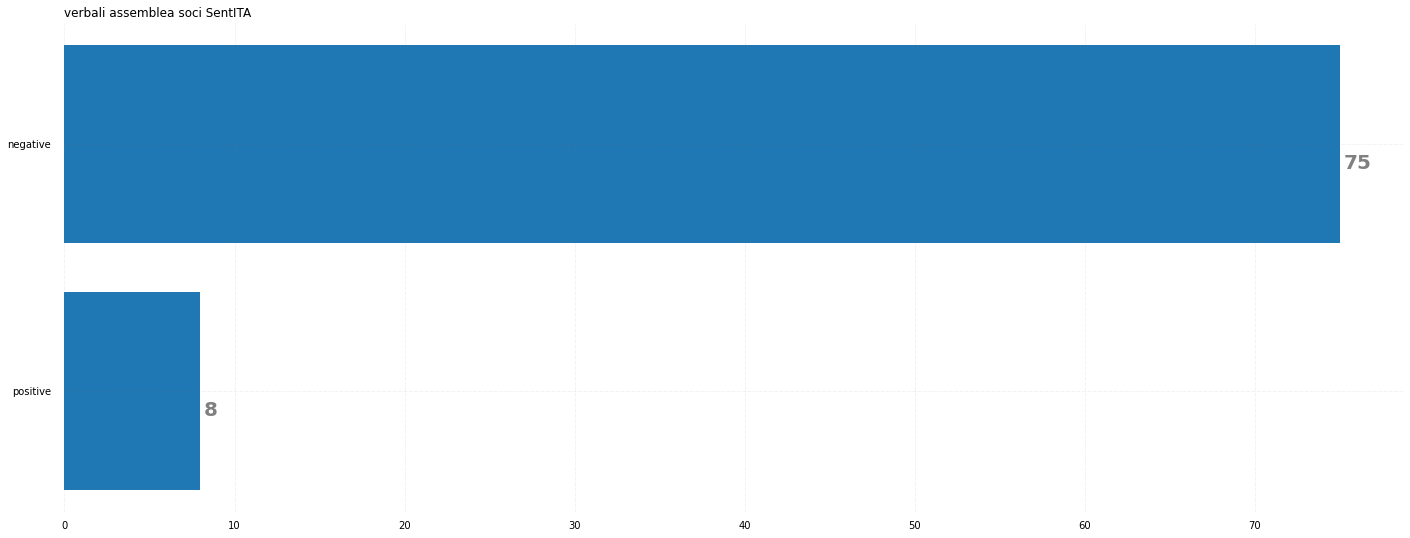

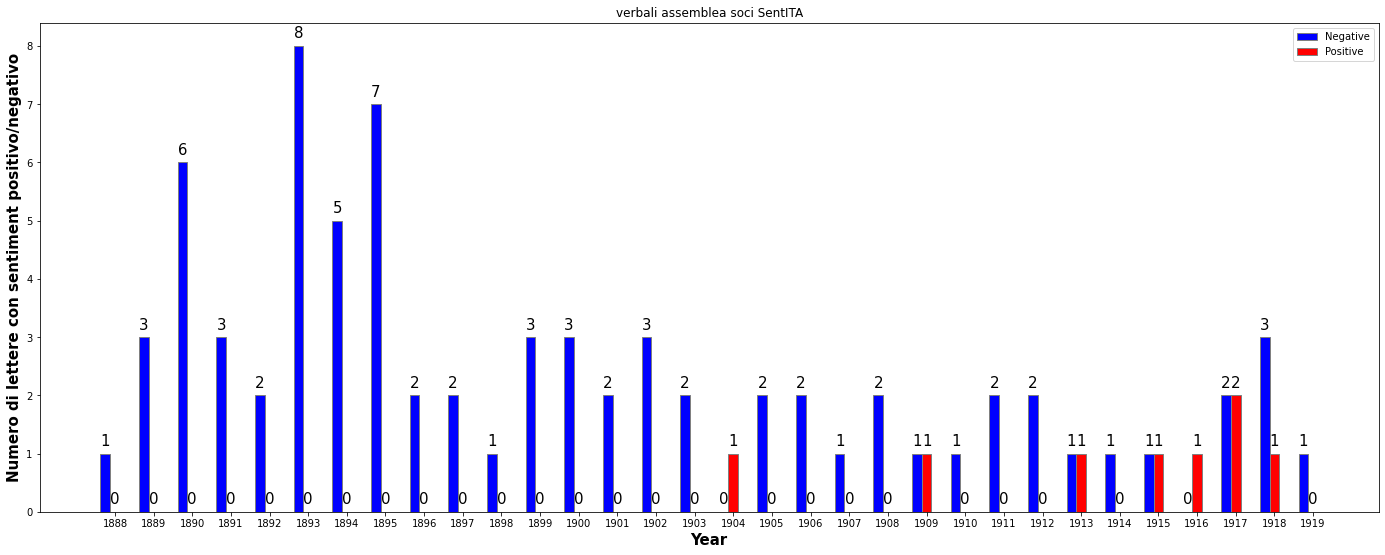

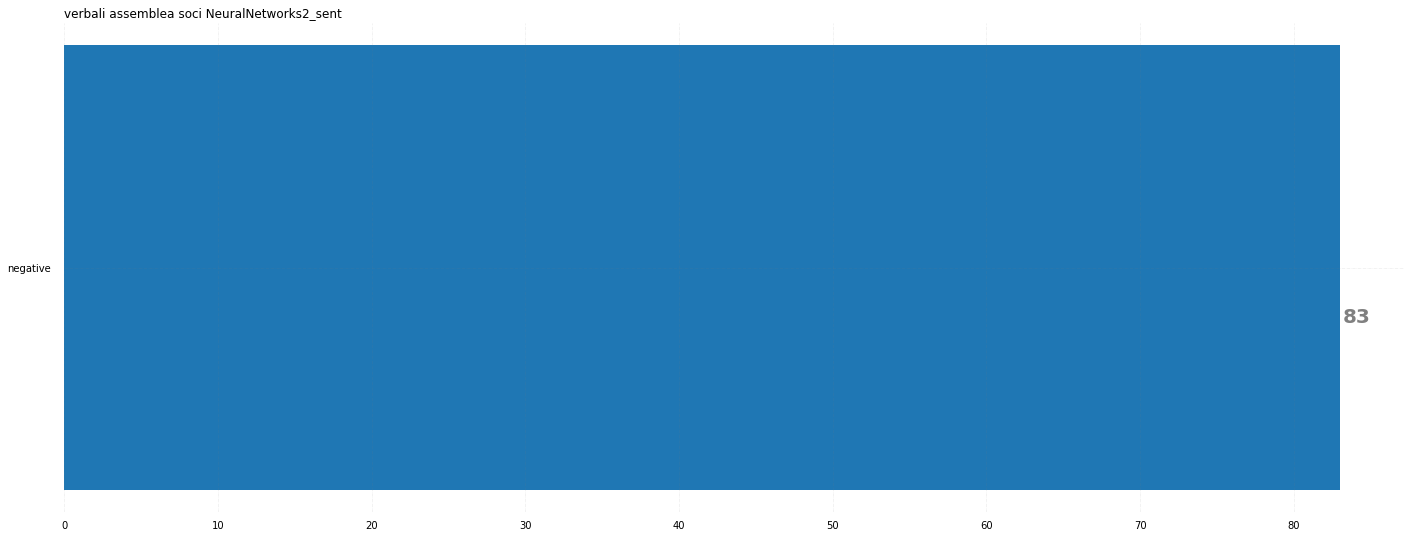

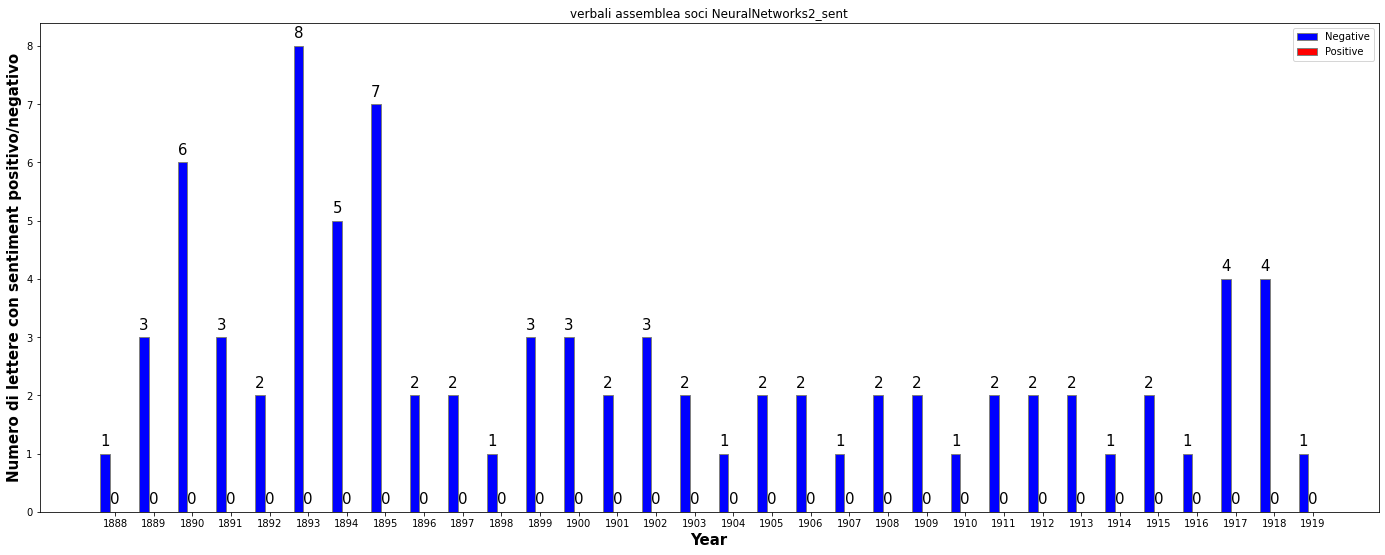

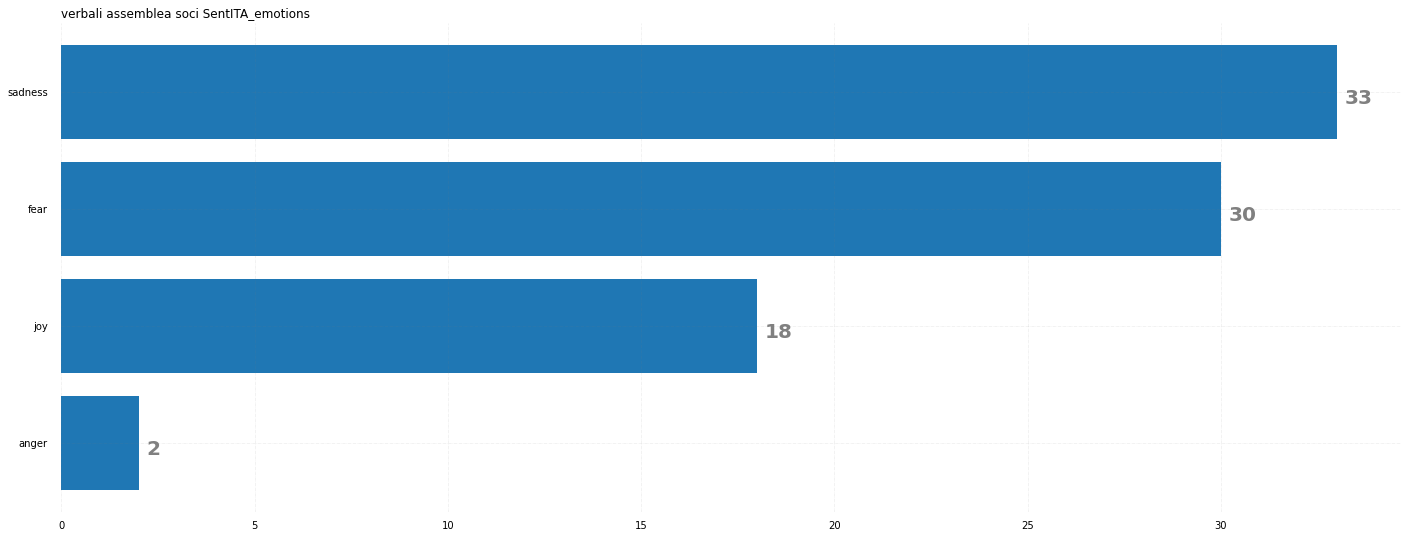

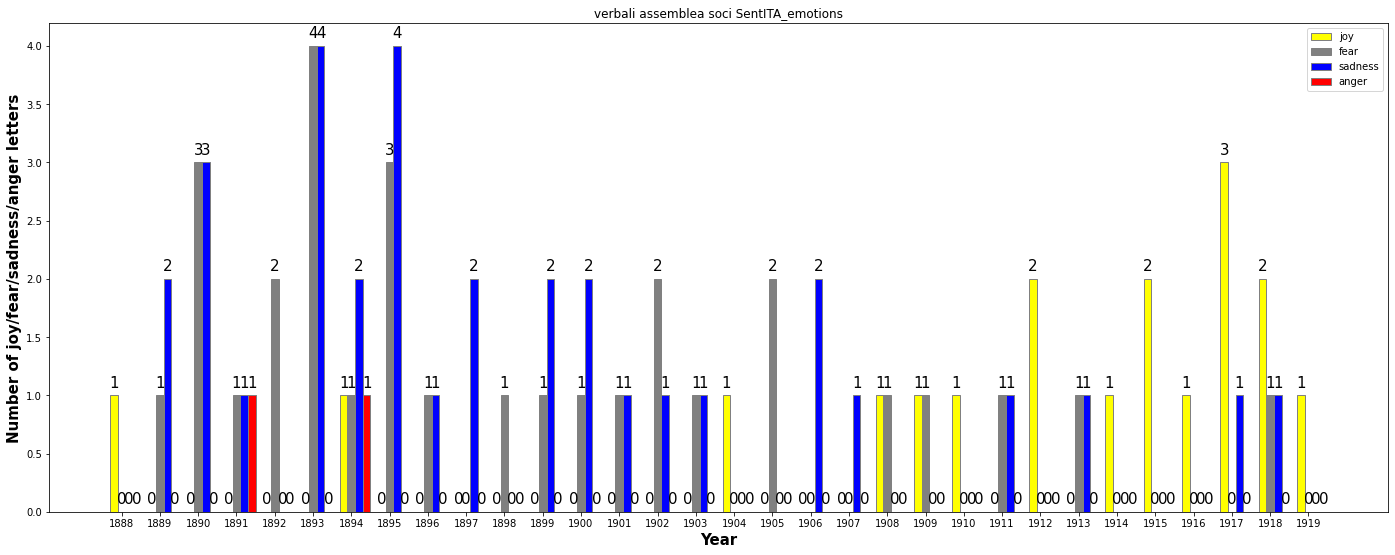

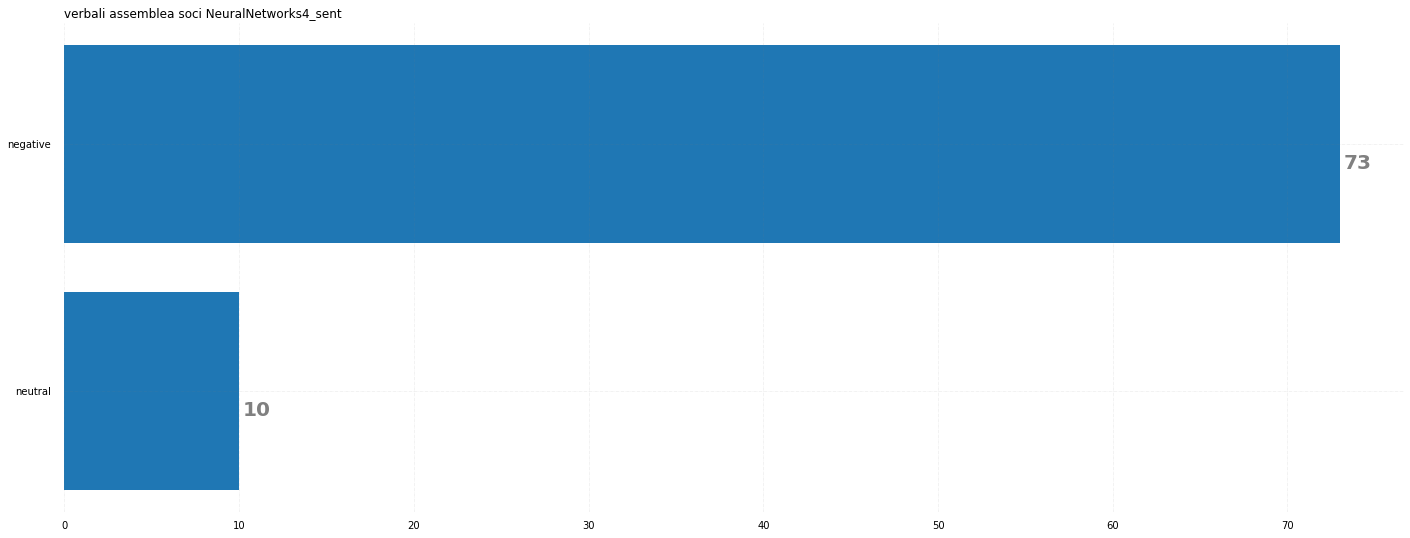

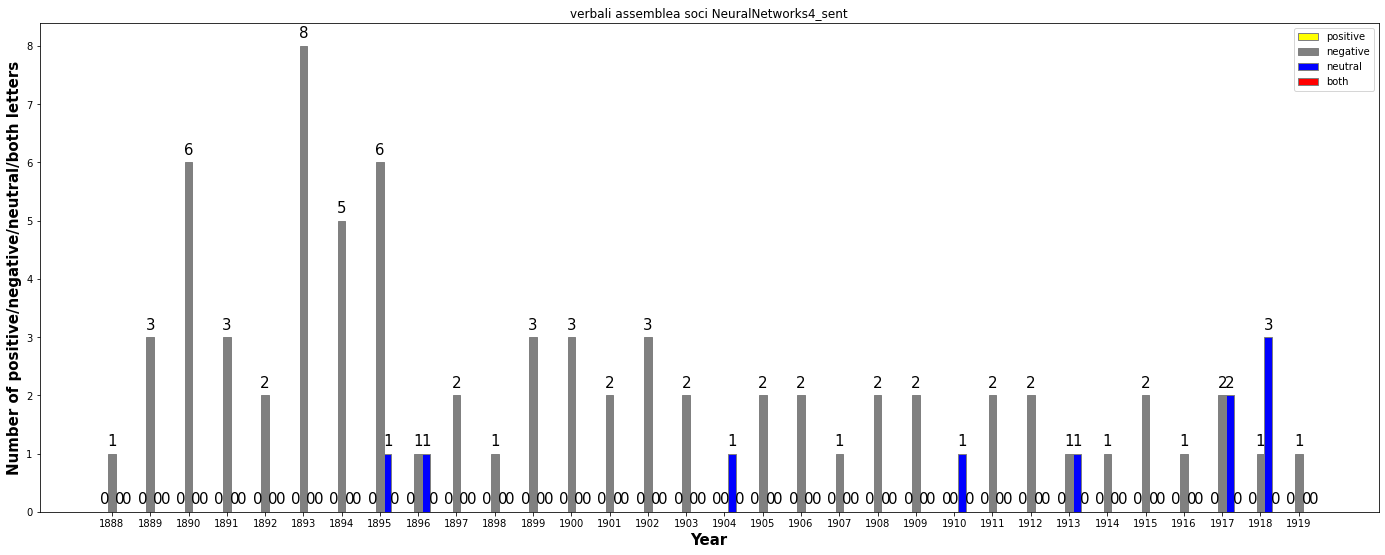

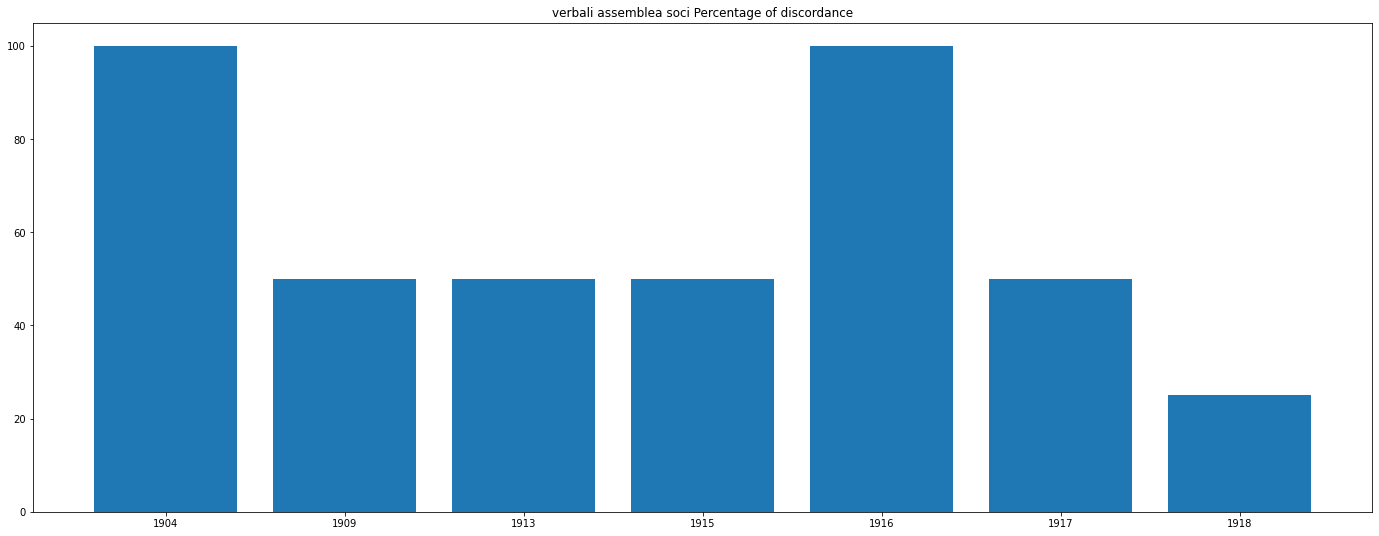

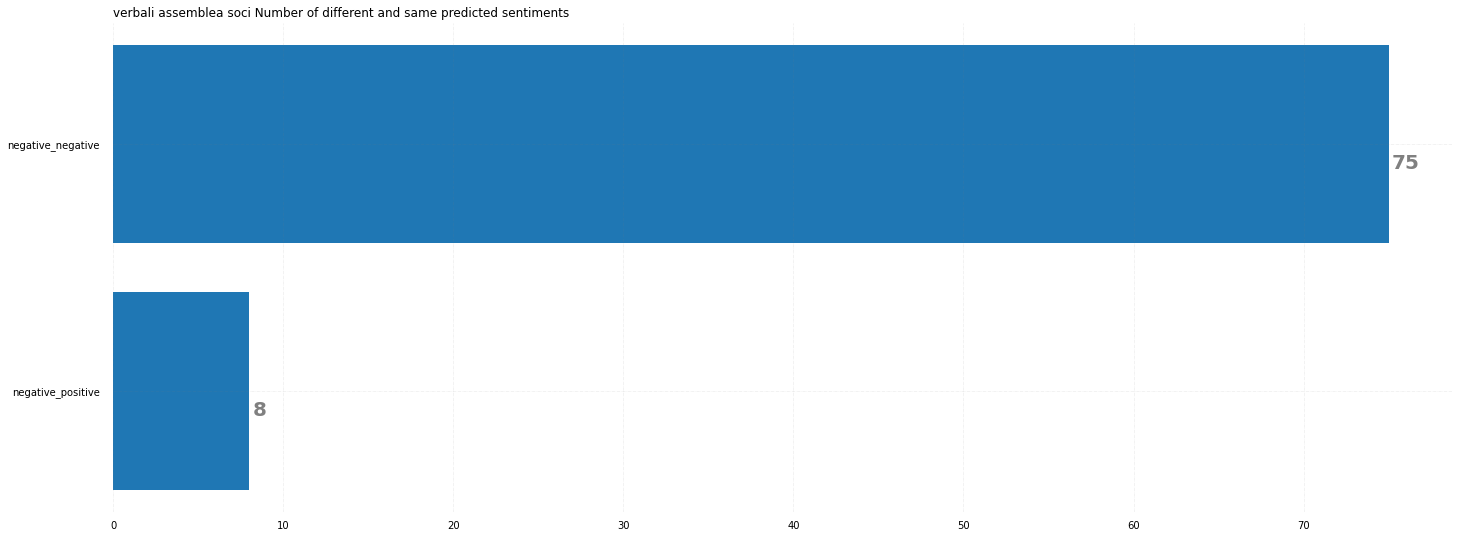

In [ ]:
for key in letters_df_dict:
  print(key)

  exp = generate_all_sentiment_plots(letters_df_dict[key], key)

In [ ]:
def insert_in_na_df(df_dict, na_dict):
  model_row = ["NeuralNetworks2_sent",	"NeuralNetworks4_sent",	"SentITA"	,"SentITA_emotions"]

  for key in na_dict:
    model_dict_list = {}
    index_dict_cnt = {}
    for m in model_row:
       model_dict_list[m] = []
       index_dict_cnt[m] = 0
    for index, row in na_dict[key].iterrows():

      for m_row in model_row:

        if isinstance(row['tabTrascrLettere_lettere::testoTab'], float):
          model_dict_list[m_row].append(np.nan)
        else:
          model_dict_list[m_row].append( df_dict[key][m_row][index_dict_cnt[m_row]])
          index_dict_cnt[m_row] +=1
    for m in model_row:
       na_dict[key][m] = model_dict_list[m] 

  return na_dict
# letters_df_na[key][] = model_dict_list

In [ ]:
final_df_dict = insert_in_na_df(letters_df_dict, letters_df_na)

In [ ]:
!pip install xlsxwriter

     |████████████████████████████████| 149 kB 5.1 MB/s 


In [ ]:
import xlsxwriter
for key in final_df_dict:
  final_df_dict[key].replace({'negative':'negativo','positive':'positivo', 'both':'positivo e negativo','neutral':'neutrale','joy':'gioia','fear':'paura','anger':'rabbia','sadness':'tristezza'}).to_excel("sentiments_"+key+".xlsx",sheet_name=key,engine='xlsxwriter')